In [131]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
from scipy import stats
import geopandas as gpd
import plotly.express as px
import nbformat
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.patheffects as PathEffects
from matplotlib.patches import Polygon
from scipy.stats import linregress

In [132]:
# Step 1: Load data from Excel file
file_path = r'Resources/Wine_Country_Weather_Data_adj.xlsx' 
wine_country_weather_data_df = pd.read_excel(file_path, sheet_name='Table')

# Step 2: Display the first few rows of the DataFrame to verify loading
wine_country_weather_data_df.head()

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity,Country_Code,DP10,DP1X,...,DX90,EMNT,EMXP,EMXT,HTDD,MNPN,MXPN,PRCP,TAVG,TMAX
0,Asia,Afghanistan,Wine,Consumption,1995,1000 hl,0,AF,0,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
1,Asia,Afghanistan,Wine,Imports,1995,1000 hl,0,AF,0,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
2,Asia,Afghanistan,Wine,Production,1995,1000 hl,0,AF,0,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
3,Asia,Afghanistan,Wine,Consumption,1996,1000 hl,0,AF,0,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
4,Asia,Afghanistan,Wine,Imports,1996,1000 hl,0,AF,0,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0


In [133]:
# Load data from Excel file
file_path = r'Resources/Wine_Country_Weather_Data_adj.xlsx' 
glossary_df = pd.read_excel(file_path, sheet_name='Glossary')

# Adjust display options to show entire strings
pd.set_option('display.max_colwidth', 60)

# Display the first few rows of the glossary dataframe
glossary_df

,DataType,Definition
0,DP10,Number of days with >= 0.1 inch
1,DP1X,Number of days with >= 1.00 inch
2,DT32,Number of days with maximum temperature <= 32 degrees Fa...
3,DX70,Number of days with maximum temperature >= 70 degrees Fa...
4,DX90,Number of days with maximum temperature >= 90 degrees Fa...
5,EMNT,Extreme minimum temperature for month. Lowest daily mini...
6,EMXP,Highest daily total of precipitation in the month. Given...
7,EMXT,Extreme maximum temperature for month. Highest daily max...
8,HTDD,Heating Degree Days. Computed when daily average tempera...
9,MNPN,Monthly Mean Minimum Temperature of evaporation pan wate...


In [134]:
# Convert quantity from 1000hl to gallons
# Assuming the quantity column is named 'quantity' and it is in '1000hl'
# 1 hectoliter (hl) is approximately 26.4172 gallons
# Therefore, 1000 hl is 1000 * 26.4172 gallons

conversion_factor = 26.4172
wine_country_weather_data_df['Quantity_gallons'] = wine_country_weather_data_df['Quantity'].astype(float) * 1000 * conversion_factor

# Reorder columns to place 'Quantity_Gallons' right after 'Quantity'
columns = list(wine_country_weather_data_df.columns)
quantity_index = columns.index('Quantity')
columns.insert(quantity_index + 1, columns.pop(columns.index('Quantity_gallons')))
wine_country_weather_data_final_df = wine_country_weather_data_df[columns]

# Remove blank records where country_Country_Country_code is blank
wine_country_weather_data_final_df = wine_country_weather_data_final_df[wine_country_weather_data_final_df['Country_Code'].notna()].reset_index(drop=True)


# Display the modified dataframe
# print(wine_country_weather_data_final_df.head())
wine_country_weather_data_final_df.head()

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity,Quantity_gallons,Country_Code,DP10,...,DX90,EMNT,EMXP,EMXT,HTDD,MNPN,MXPN,PRCP,TAVG,TMAX
0,Asia,Afghanistan,Wine,Consumption,1995,1000 hl,0,0.0,AF,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
1,Asia,Afghanistan,Wine,Imports,1995,1000 hl,0,0.0,AF,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
2,Asia,Afghanistan,Wine,Production,1995,1000 hl,0,0.0,AF,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
3,Asia,Afghanistan,Wine,Consumption,1996,1000 hl,0,0.0,AF,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
4,Asia,Afghanistan,Wine,Imports,1996,1000 hl,0,0.0,AF,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0


Total wine production for all countries combined from 1995 to 2023

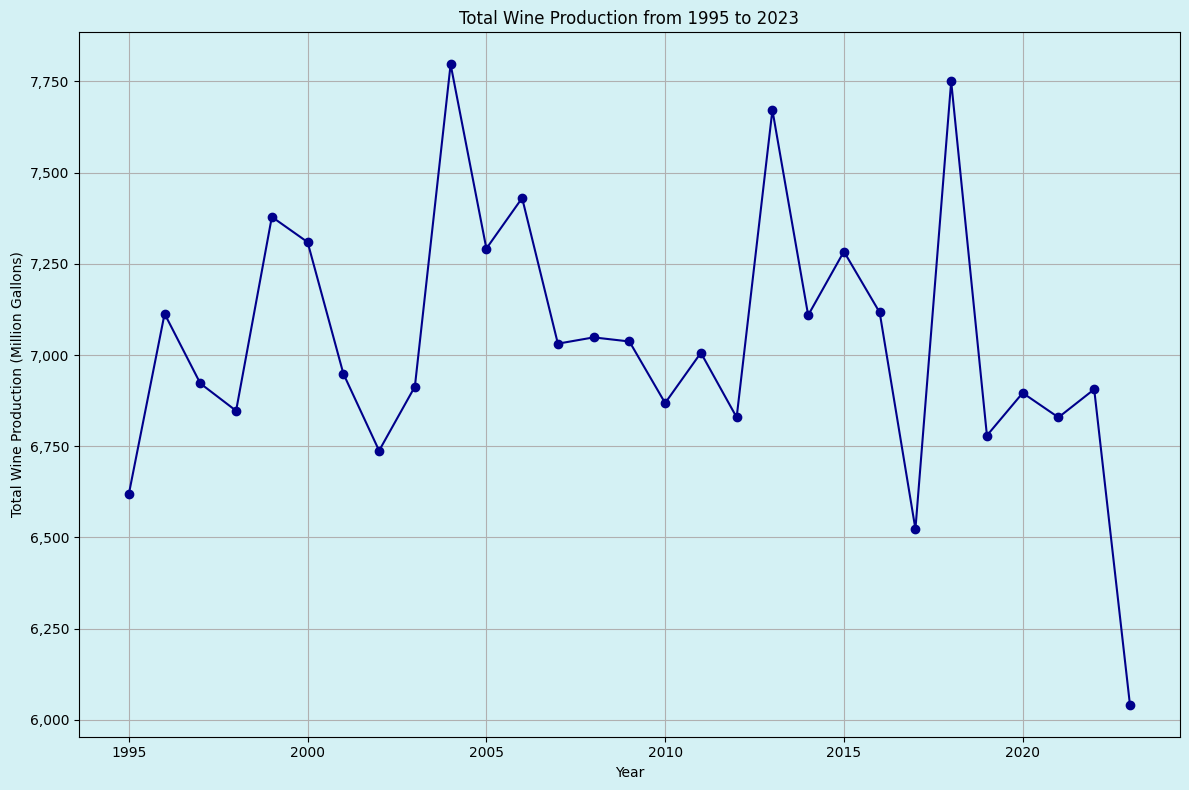

<Figure size 640x480 with 0 Axes>

In [135]:
# Filter the data to include only wine production records
wine_production_df = wine_country_weather_data_final_df[wine_country_weather_data_final_df['Variable'] == 'Production']
wine_production_path = 'Resources/Wine_data_all_Production.csv'
wine_production_df.to_csv(wine_production_path, index=False)
# Group by Year and sum the Quantity_gallons
wine_production_by_year = wine_production_df.groupby('Year')['Quantity_gallons'].sum().reset_index()

# Convert the Quantity_gallons to millions
wine_production_by_year['Quantity_gallons_million'] = wine_production_by_year['Quantity_gallons'] / 1e6

# Define a function to format the y-axis values with thousand commas
def millions_formatter(x, pos):
    return f'{x:,.0f}'

# Create the line plot
plt.figure(figsize=(12, 8))
plt.plot(wine_production_by_year['Year'], wine_production_by_year['Quantity_gallons_million'], marker='o', linestyle='-', color='darkblue')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Total Wine Production (Million Gallons)')
plt.title('Total Wine Production from 1995 to 2023')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
plt.savefig('Figures/WineProduction1995-2023.png')

In [136]:
wine_production_df

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity,Quantity_gallons,Country_Code,DP10,...,DX90,EMNT,EMXP,EMXT,HTDD,MNPN,MXPN,PRCP,TAVG,TMAX
2,Asia,Afghanistan,Wine,Production,1995,1000 hl,0,0.0,AF,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
5,Asia,Afghanistan,Wine,Production,1996,1000 hl,0,0.0,AF,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
8,Asia,Afghanistan,Wine,Production,1997,1000 hl,0,0.0,AF,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
11,Asia,Afghanistan,Wine,Production,1998,1000 hl,0,0.0,AF,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
14,Asia,Afghanistan,Wine,Production,1999,1000 hl,0,0.0,AF,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19045,Africa,Zimbabwe,Wine,Production,2018,1000 hl,20,528344.0,ZI,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
19049,Africa,Zimbabwe,Wine,Production,2019,1000 hl,14,369840.8,ZI,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
19053,Africa,Zimbabwe,Wine,Production,2020,1000 hl,14,369840.8,ZI,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
19057,Africa,Zimbabwe,Wine,Production,2021,1000 hl,14,369840.8,ZI,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0


Map of total wine production by country in 1995

In [137]:
# Filter the data to include only wine production records and for the year 1995
wine_production_1995_df = wine_country_weather_data_final_df[(wine_country_weather_data_final_df['Variable'] == 'Production') & (wine_country_weather_data_final_df['Year'] == 1995)]

# Group by Region/Country and sum the Quantity_gallons
wine_production_1995_by_country = wine_production_1995_df.groupby('Region/Country')['Quantity_gallons'].sum().reset_index()

# Create the choropleth map
fig = px.choropleth(
    wine_production_1995_by_country,
    locations="Region/Country",
    locationmode="country names",
    color="Quantity_gallons",
    hover_name="Region/Country",
    color_continuous_scale=px.colors.sequential.OrRd,
    labels={'Quantity_gallons': 'Total Wine Production (Gallons)'},
    title='Total Wine Production by Country in 1995'
)

# Customize the layout
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
    margin={"r":0,"t":30,"l":0,"b":0}
)

# Show the plot
fig.show()

Map of total wine production by country in 2023

In [138]:
#  Filter the data to include only wine production records and for the year 2023
wine_production_2023_df = wine_country_weather_data_final_df[(wine_country_weather_data_final_df['Variable'] == 'Production') & (wine_country_weather_data_final_df['Year'] == 2023)]

# Group by Region/Country and sum the Quantity_gallons
wine_production_2023_by_country = wine_production_2023_df.groupby('Region/Country')['Quantity_gallons'].sum().reset_index()

# Create the choropleth map
fig = px.choropleth(
    wine_production_2023_by_country,
    locations="Region/Country",
    locationmode="country names",
    color="Quantity_gallons",
    hover_name="Region/Country",
    color_continuous_scale=px.colors.sequential.OrRd,
    labels={'Quantity_gallons': 'Total Wine Production (Gallons)'},
    title='Total Wine Production by Country in 2023'
)

# Customize the layout
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
    margin={"r":0,"t":30,"l":0,"b":0}
)

# Show the plot
fig.show()


# Question 1: Which were the top wine producing countries from year 1995?

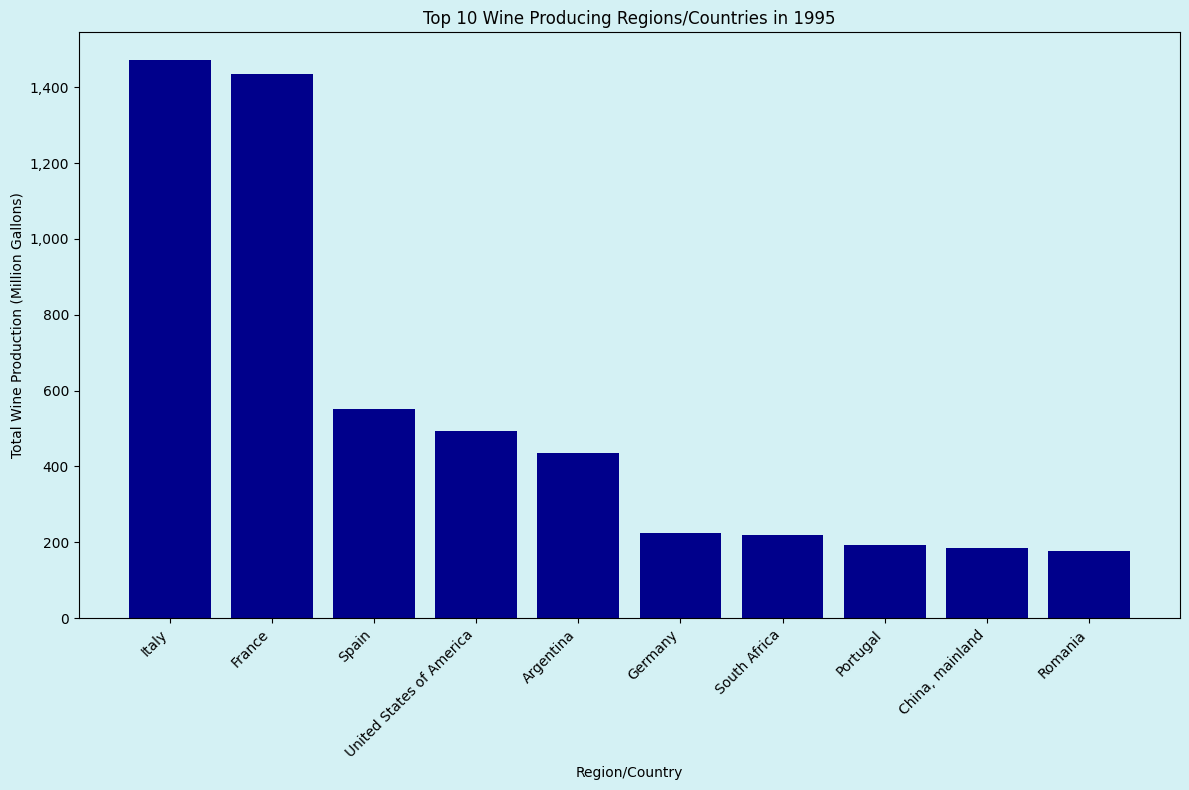

In [139]:
# Filter the data to include only wine production records and for the year 1995
wine_production_df = wine_country_weather_data_final_df[(wine_country_weather_data_final_df['Variable'] == 'Production') & (wine_country_weather_data_final_df['Year'] == 1995)]

# Group by Region/Country and sum the Quantity_gallons
wine_production_by_region = wine_production_df.groupby('Region/Country')['Quantity_gallons'].sum().reset_index()

# Convert the Quantity_gallons to millions
wine_production_by_region['Quantity_gallons_million'] = wine_production_by_region['Quantity_gallons'] / 1e6

# Sort the values in descending order and get the top 10
top_10_wine_producing_regions = wine_production_by_region.sort_values(by='Quantity_gallons_million', ascending=False).head(10)

# Define a function to format the y-axis values with thousand commas
def millions_formatter(x, pos):
    return f'{x:,.0f}'

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_10_wine_producing_regions['Region/Country'], top_10_wine_producing_regions['Quantity_gallons_million'], color='darkblue')
plt.xlabel('Region/Country')
plt.ylabel('Total Wine Production (Million Gallons)')
plt.title('Top 10 Wine Producing Regions/Countries in 1995')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better readability
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.tight_layout()  # Adjust layout to make room for rotated x labels
plt.show()

# Question 2: Which were the top wine producing countries from year 2023?

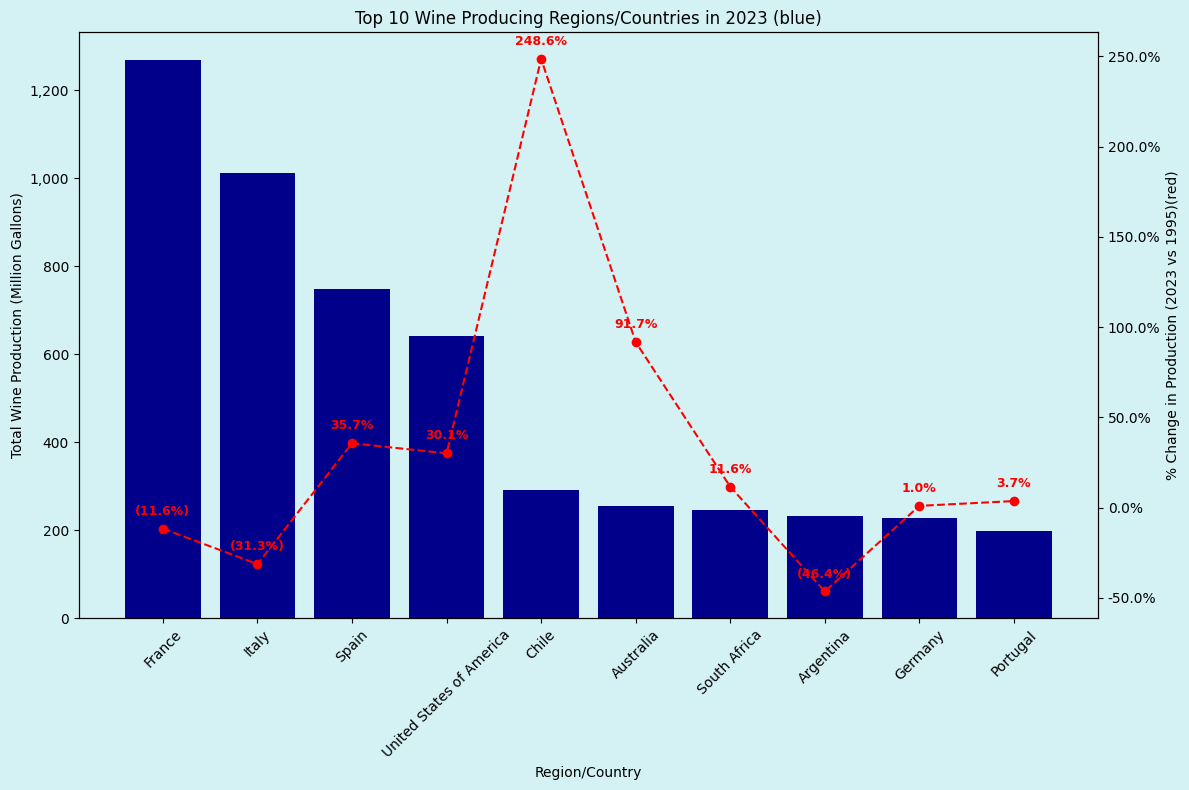

In [140]:
# Filter the data to include only wine production records and for the year 1995
wine_production_df_1995 = wine_country_weather_data_final_df[(wine_country_weather_data_final_df['Variable'] == 'Production') & (wine_country_weather_data_final_df['Year'] == 1995)]

# Filter the data to include only wine production records and for the year 2023
wine_production_df_2023 = wine_country_weather_data_final_df[(wine_country_weather_data_final_df['Variable'] == 'Production') & (wine_country_weather_data_final_df['Year'] == 2023)]

# Group by Region/Country and sum the Quantity_gallons for 1995 and 2023
wine_production_by_region_1995 = wine_production_df_1995.groupby('Region/Country')['Quantity_gallons'].sum().reset_index()
wine_production_by_region_2023 = wine_production_df_2023.groupby('Region/Country')['Quantity_gallons'].sum().reset_index()

# Merge the two dataframes on Region/Country
wine_production_comparison = pd.merge(wine_production_by_region_1995, wine_production_by_region_2023, on='Region/Country', suffixes=('_1995', '_2023'))

# Calculate the percentage change
wine_production_comparison['Percentage_change'] = ((wine_production_comparison['Quantity_gallons_2023'] - wine_production_comparison['Quantity_gallons_1995']) / wine_production_comparison['Quantity_gallons_1995']) * 100

# Convert the Quantity_gallons_2023 to millions for plotting
wine_production_comparison['Quantity_gallons_2023_million'] = wine_production_comparison['Quantity_gallons_2023'] / 1e6

# Sort the values in descending order and get the top 10
top_10_wine_producing_regions = wine_production_comparison.sort_values(by='Quantity_gallons_2023_million', ascending=False).head(10)

# Define a function to format the y-axis values with thousand commas
def millions_formatter(x, pos):
    return f'{x:,.0f}'

# Define a function to format the percentage change values with one decimal place
def percentage_formatter(x, pos):
    return f'{x:,.1f}%'

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.bar(top_10_wine_producing_regions['Region/Country'], top_10_wine_producing_regions['Quantity_gallons_2023_million'], color='darkblue')
ax1.set_xlabel('Region/Country')
ax1.set_ylabel('Total Wine Production (Million Gallons)')
ax1.set_title('Top 10 Wine Producing Regions/Countries in 2023 (blue)')
ax1.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax1.tick_params(axis='x', rotation=45)

# Create the secondary axis
ax2 = ax1.twinx()
ax2.plot(top_10_wine_producing_regions['Region/Country'], top_10_wine_producing_regions['Percentage_change'], color='red', marker='o', linestyle='--')
ax2.set_ylabel('% Change in Production (2023 vs 1995)(red)')
ax2.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Add data labels to the line graph
for i, txt in enumerate(top_10_wine_producing_regions['Percentage_change']):
    label = f'{txt:.1f}%' if txt >= 0 else f'({-txt:.1f}%)'
    ax2.annotate(label, (top_10_wine_producing_regions['Region/Country'].iloc[i], top_10_wine_producing_regions['Percentage_change'].iloc[i]), 
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='red', fontweight='bold')

plt.tight_layout()  # Adjust layout to make room for rotated x labels
plt.show()

# 3. What is the correlation between temperature and wine production?


In [141]:
#Load wine data
# Filter the data to include only wine production records and for the year 1995
wine_production_df = wine_country_weather_data_final_df[(wine_country_weather_data_final_df['Variable'] == 'Production') & (wine_country_weather_data_final_df['Year'] == 1995)]

# Group by Region/Country and sum the Quantity_gallons
wine_production_by_region = wine_production_df.groupby('Region/Country')['Quantity_gallons'].sum().reset_index()

# Convert the Quantity_gallons to millions
wine_production_by_region['Quantity_gallons_million'] = wine_production_by_region['Quantity_gallons'] / 1e6

wine_production_df

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity,Quantity_gallons,Country_Code,DP10,...,DX90,EMNT,EMXP,EMXT,HTDD,MNPN,MXPN,PRCP,TAVG,TMAX
2,Asia,Afghanistan,Wine,Production,1995,1000 hl,0,0.0,AF,0,...,0,0.00,0.00,0.000000,0,0,0,0.00,0.000000,0.000000
87,Europe,Albania,Wine,Production,1995,1000 hl,169,4464506.8,AL,97,...,31,0.00,13.67,100.000000,0,0,0,90.82,0.000000,66.900000
199,Africa,Algeria,Wine,Production,1995,1000 hl,571,15084221.2,AG,40,...,27,26.25,1.60,107.833333,1792,0,0,21.72,70.050000,81.116667
310,Oceania,American Samoa,Wine,Production,1995,1000 hl,0,0.0,AQ,157,...,44,73.00,4.83,93.000000,0,0,0,124.19,82.700000,87.400000
395,Africa,Angola,Wine,Production,1995,1000 hl,0,0.0,AO,0,...,0,0.00,0.00,0.000000,0,0,0,0.00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18559,Oceania,Vanuatu,Wine,Production,1995,1000 hl,0,0.0,NH,108,...,17,0.00,3.39,92.000000,0,0,0,74.27,0.000000,84.600000
18644,America,Venezuela,Wine,Production,1995,1000 hl,0,0.0,VE,64,...,125,63.50,2.93,93.714286,0,0,0,48.89,80.083333,87.200000
18756,Asia,Vietnam,Wine,Production,1995,1000 hl,0,0.0,VM,62,...,102,0.00,3.70,101.000000,0,0,0,41.30,0.000000,85.500000
18841,Africa,Zambia,Wine,Production,1995,1000 hl,0,0.0,ZA,0,...,0,0.00,0.00,0.000000,0,0,0,0.00,0.000000,0.000000


In [142]:
# Drop unnecessary columns
import pandas as pd

# Get all columns up to and including 'Country_Code'
columns_to_keep = wine_production_df.columns[:wine_production_df.columns.get_loc('Country_Code') + 1]

# Select only the columns to keep
wine_data_df= wine_production_df[columns_to_keep]
wine_data_df_path = 'Resources/Wine_data_all_Production_cleaned.csv'
wine_data_df.to_csv(wine_data_df_path, index=False)

# Print the modified DataFrame
print(wine_data_df)

      Continent  Region/Country Product    Variable  Year     Unit  Quantity  \
2          Asia     Afghanistan    Wine  Production  1995  1000 hl         0   
87       Europe         Albania    Wine  Production  1995  1000 hl       169   
199      Africa         Algeria    Wine  Production  1995  1000 hl       571   
310     Oceania  American Samoa    Wine  Production  1995  1000 hl         0   
395      Africa          Angola    Wine  Production  1995  1000 hl         0   
...         ...             ...     ...         ...   ...      ...       ...   
18559   Oceania         Vanuatu    Wine  Production  1995  1000 hl         0   
18644   America       Venezuela    Wine  Production  1995  1000 hl         0   
18756      Asia         Vietnam    Wine  Production  1995  1000 hl         0   
18841    Africa          Zambia    Wine  Production  1995  1000 hl         0   
18953    Africa        Zimbabwe    Wine  Production  1995  1000 hl        15   

       Quantity_gallons Country_Code  


### Prepare wine Production data to be joined with updated climate data

In [143]:
import pandas as pd

# Load the CSV file
file_path = 'Resources/Wine_data_all_Production.csv'
wine_data_df = pd.read_csv(file_path)

# Remove unnecessary columns
columns_to_remove = ['Variable', 'Continent', 'Product', 'Unit']
wine_data_df = wine_data_df.drop(columns=columns_to_remove)

# Rename columns
columns_to_rename = {
    'Region/Country': 'Country',
    'Quantity': 'Quantity_hl',
    'Quantity_gallons': 'Gallons',
    'Country_Code': 'code'
}
wine_data_df = wine_data_df.rename(columns=columns_to_rename)

# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = 'Resources/Wine_data_Production_cleaned.csv'
wine_data_df.to_csv(cleaned_file_path, index=False)

# Display the cleaned DataFrame
print(wine_data_df.head())



       Country  Year  Quantity_hl  Gallons code  DP10  DP1X  DT32  DX70  DX90  \
0  Afghanistan  1995            0      0.0   AF     0     0     0     0     0   
1  Afghanistan  1996            0      0.0   AF     0     0     0     0     0   
2  Afghanistan  1997            0      0.0   AF     0     0     0     0     0   
3  Afghanistan  1998            0      0.0   AF     0     0     0     0     0   
4  Afghanistan  1999            0      0.0   AF     0     0     0     0     0   

   EMNT  EMXP  EMXT  HTDD  MNPN  MXPN  PRCP  TAVG  TMAX  
0   0.0   0.0   0.0     0     0     0   0.0   0.0   0.0  
1   0.0   0.0   0.0     0     0     0   0.0   0.0   0.0  
2   0.0   0.0   0.0     0     0     0   0.0   0.0   0.0  
3   0.0   0.0   0.0     0     0     0   0.0   0.0   0.0  
4   0.0   0.0   0.0     0     0     0   0.0   0.0   0.0  


### Clean and pivot climate data tables to one record for each station / year

In [144]:
import pandas as pd


# Load the Weather Data
file_path = 'Resources/weather_all_country_codes3.csv'
df = pd.read_csv(file_path)

# Convert date to just the year
df['date'] = pd.to_datetime(df['date']).dt.year

# Pivot the Weather DataFrame
pivoted_df = df.pivot_table(index=['station', 'date'], columns='datatype', values='value').reset_index()

# Load the Station Codes Data
column_names = ['station_id', 'latitude', 'longitude', 'elevation', 'location']
colspecs = [(0, 11), (12, 20), (21, 30), (31, 37), (38, None)]
file_path_txt = 'Resources/stationcodes.txt'
df_station_codes = pd.read_fwf(file_path_txt, colspecs=colspecs, header=None, names=column_names)

# Rename Columns for Merging
df_station_codes.rename(columns={'station_id': 'station', 'country': 'code'}, inplace=True)

# Clean Column Names
pivoted_df.columns = pivoted_df.columns.str.strip()
df_station_codes.columns = df_station_codes.columns.str.strip()

# Remove the 'GHCND:' prefix from the 'station' column in both DataFrames
pivoted_df['station'] = pivoted_df['station'].str.replace('GHCND:', '', regex=False)
df_station_codes['station'] = df_station_codes['station'].str.replace('GHCND:', '', regex=False)

# Update the 'code' values
pivoted_df['code'] = pivoted_df['station'].str[:2]

# Merge the DataFrames to add Lat, Long to weather data
merged_df = pd.merge(pivoted_df, df_station_codes, on='station', how='left')

# Export the merged DataFrame to a CSV file
output_file_path = 'Outputs/merged_weather_data.csv'
merged_df.to_csv(output_file_path, index=False)
print(f"Merged DataFrame exported to {output_file_path}")

# Display the merged DataFrame
print(merged_df.head())

# Load the country codes data
country_file_path = 'Resources/fips-countries.csv'
country_df = pd.read_csv(country_file_path)

# Merge the weather data with country data using 'code'
merged_df = pd.merge(merged_df, country_df, on='code', how='left')

# Save the final merged DataFrame to a new CSV file
final_output_path = 'Outputs/merged_weather_country_data_Station_year.csv'
merged_df.to_csv(final_output_path, index=False)

# Display the first few rows of the merged DataFrame
merged_df

# If you want to download the file programmatically (optional), you can use:
# from google.colab import files
# files.download(final_output_path)




Merged DataFrame exported to Outputs/merged_weather_data.csv
       station  date  DP10  DP1X  DT32   DX70   DX90  EMNT  EMXP   EMXT  ...  \
0  AE000041196  2012   NaN   NaN   NaN  346.0  226.0   NaN   NaN  121.0  ...   
1  AE000041196  2023   8.0   1.0   NaN    NaN    NaN   NaN  1.06    NaN  ...   
2  AEM00041194  2004   4.0   0.0   NaN    NaN    NaN   NaN  0.90    NaN  ...   
3  AEM00041194  2006   7.0   1.0   NaN    NaN    NaN   NaN  1.77    NaN  ...   
4  AEM00041194  2010   5.0   1.0   NaN    NaN    NaN   NaN  3.15    NaN  ...   

   MNPN  MXPN  PRCP  TAVG  TMAX  code latitude  longitude  elevation  \
0   NaN   NaN   NaN   NaN  96.0    AE   25.333     55.517       34.0   
1   NaN   NaN  3.42   NaN   NaN    AE   25.333     55.517       34.0   
2   NaN   NaN  2.31   NaN   NaN    AE   25.255     55.364       10.4   
3   NaN   NaN  4.08   NaN   NaN    AE   25.255     55.364       10.4   
4   NaN   NaN  4.83   NaN   NaN    AE   25.255     55.364       10.4   

                         

,station,date,DP10,DP1X,DT32,DX70,DX90,EMNT,EMXP,EMXT,...,MXPN,PRCP,TAVG,TMAX,code,latitude,longitude,elevation,location,country
0,AE000041196,2012,NaN,NaN,NaN,346.0,226.0,NaN,NaN,121.0,...,NaN,NaN,NaN,96.0,AE,25.333,55.517,34.0,SHARJAH INTER. AIRP GSN 41196,United Arab Emirates
1,AE000041196,2023,8.0,1.0,NaN,NaN,NaN,NaN,1.06,NaN,...,NaN,3.42,NaN,NaN,AE,25.333,55.517,34.0,SHARJAH INTER. AIRP GSN 41196,United Arab Emirates
2,AEM00041194,2004,4.0,0.0,NaN,NaN,NaN,NaN,0.90,NaN,...,NaN,2.31,NaN,NaN,AE,25.255,55.364,10.4,DUBAI INTL 41194,United Arab Emirates
3,AEM00041194,2006,7.0,1.0,NaN,NaN,NaN,NaN,1.77,NaN,...,NaN,4.08,NaN,NaN,AE,25.255,55.364,10.4,DUBAI INTL 41194,United Arab Emirates
4,AEM00041194,2010,5.0,1.0,NaN,NaN,NaN,NaN,3.15,NaN,...,NaN,4.83,NaN,NaN,AE,25.255,55.364,10.4,DUBAI INTL 41194,United Arab Emirates
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31219,WA010101860,2003,35.0,0.0,0.0,348.0,117.0,38.0,0.87,100.0,...,NaN,12.60,72.3,85.5,WA,-19.600,18.117,1400.0,GROOTFONTEIN GSN 68014,Namibia
31220,WA010101860,2022,NaN,NaN,NaN,348.0,126.0,NaN,NaN,99.0,...,NaN,NaN,NaN,86.5,WA,-19.600,18.117,1400.0,GROOTFONTEIN GSN 68014,Namibia
31221,WA012084750,1998,NaN,NaN,NaN,340.0,210.0,NaN,NaN,103.0,...,NaN,NaN,NaN,90.7,WA,-17.917,19.767,1100.0,RUNDU 68018,Namibia
31222,WA012084750,1999,NaN,NaN,NaN,343.0,132.0,NaN,NaN,102.0,...,NaN,NaN,NaN,88.3,WA,-17.917,19.767,1100.0,RUNDU 68018,Namibia


### Begin Spatial analysis of wine regions to weather stations

       station  date  DP10  DP1X  DT32   DX70   DX90  EMNT  EMXP   EMXT  ...  \
0  AE000041196  2012   NaN   NaN   NaN  346.0  226.0   NaN   NaN  121.0  ...   
1  AE000041196  2023   8.0   1.0   NaN    NaN    NaN   NaN  1.06    NaN  ...   
2  AEM00041194  2004   4.0   0.0   NaN    NaN    NaN   NaN  0.90    NaN  ...   
3  AEM00041194  2006   7.0   1.0   NaN    NaN    NaN   NaN  1.77    NaN  ...   
4  AEM00041194  2010   5.0   1.0   NaN    NaN    NaN   NaN  3.15    NaN  ...   

   PRCP  TAVG  TMAX  code  latitude  longitude elevation  \
0   NaN   NaN  96.0    AE    25.333     55.517      34.0   
1  3.42   NaN   NaN    AE    25.333     55.517      34.0   
2  2.31   NaN   NaN    AE    25.255     55.364      10.4   
3  4.08   NaN   NaN    AE    25.255     55.364      10.4   
4  4.83   NaN   NaN    AE    25.255     55.364      10.4   

                                       location               country  \
0  SHARJAH INTER. AIRP            GSN     41196  United Arab Emirates   
1  SHARJAH I

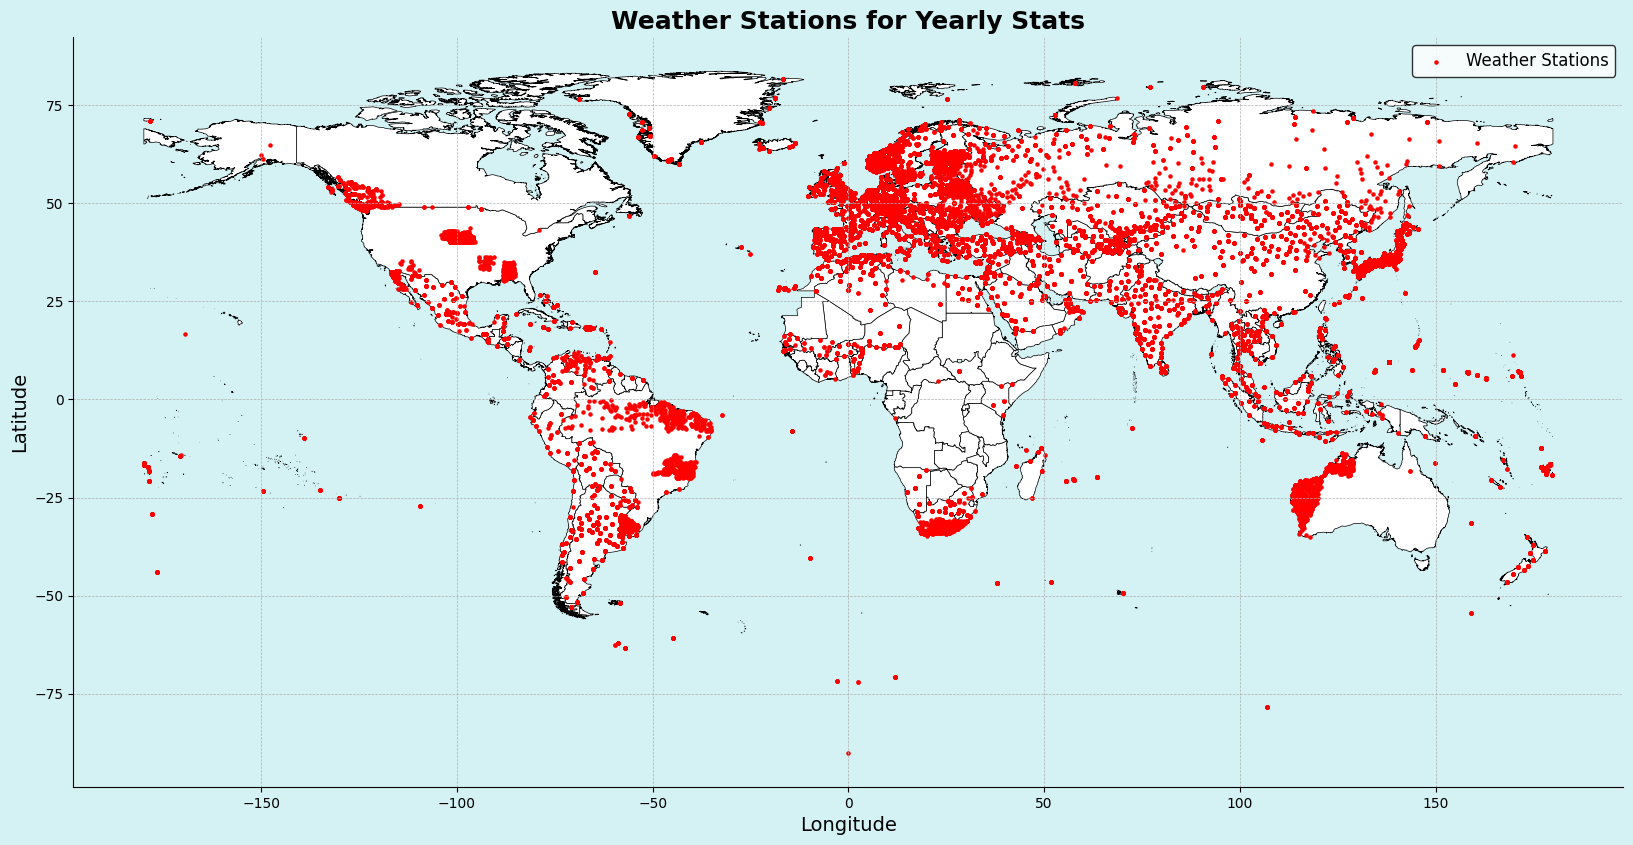

In [145]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as PathEffects
from matplotlib.patches import Polygon

font_family = "sans"
background_color = "#D4F1F4"
text_color = "#040303"

sns.set_style({
    "axes.facecolor": background_color,
    "figure.facecolor": background_color,
    "font.family": font_family,
    "text.color": text_color,
})

# Load the CSV file
csv_file_path = 'Outputs/merged_weather_country_data_Station_year.csv'
df = pd.read_csv(csv_file_path)

# Ensure the directory exists or create it
import os
save_dir = "Figures"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Create a GeoDataFrame from the CSV file
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
)

# Display the first few rows of the GeoDataFrame
print(gdf.head())

# Load the world map from the Natural Earth dataset
world_shapefile_path = 'Resources/Shapefiles/WB_countries_Admin0_10m.shp'
world = gpd.read_file(world_shapefile_path)

# Create the plot figure with the desired figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 12))

# Plot the world map with countries in white

world.plot(ax=ax, color='white', edgecolor='black', linewidth=0.5)

# Plot the weather stations from the CSV
gdf.plot(ax=ax, color='red', markersize=5, label='Weather Stations')

# Add titles and labels
plt.title('Weather Stations for Yearly Stats', fontsize=18, fontweight='bold', color=text_color)
plt.xlabel('Longitude', fontsize=14, color=text_color)
plt.ylabel('Latitude', fontsize=14, color=text_color)

# Customize legend
plt.legend(loc='upper right', fontsize=12, frameon=True, facecolor='white', edgecolor='black')

# Improve the overall aesthetics
ax.set_facecolor(background_color)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save the figure with the correct file path
plt.savefig(os.path.join(save_dir, "Weather_Stations_all.png"))

# Display the plot
plt.show()



### Find stations within wine regions

In [146]:

from shapely.geometry import Polygon, Point
from shapely.ops import unary_union


# Load the shapefile
shapefile_path = 'Resources/Shapefiles/GlobalVineyards.shp'
gdf_shape = gpd.read_file(shapefile_path)


# Check for stations that did not get lat and long coordinates
stations_df = merged_df.dropna(subset=['latitude', 'longitude'])  # Drop rows with missing coordinates

# Create a GeoDataFrame from the weather station DataFrame
geometry = [Point(xy) for xy in zip(stations_df['longitude'], stations_df['latitude'])]
gdf_stations = gpd.GeoDataFrame(stations_df, geometry=geometry)

# Ensure the GeoDataFrame uses the same coordinate system
gdf_stations.crs = "EPSG:4326"

# Re-project both GeoDataFrames to a projected CRS suitable for distance calculations
projected_crs = "EPSG:3395"  # World Mercator projection
gdf_shape = gdf_shape.to_crs(projected_crs)
gdf_stations = gdf_stations.to_crs(projected_crs)

# Convert distance to meters (100 miles is approximately 160934 meters)
buffer_distance = 160934  # 100 miles in meters

# Create a buffer around the shapefile geometries
shape_buffer = gdf_shape.geometry.buffer(buffer_distance)

# Combine all buffered shapes into a single geometry
combined_shape_buffer = unary_union(shape_buffer)

# Find weather stations within the buffer
stations_within_buffer = gdf_stations[gdf_stations.geometry.within(combined_shape_buffer)]

# Save the results to a new CSV file
output_file_path = 'Outputs/stations_within_100_miles.csv'
stations_within_buffer.to_csv(output_file_path, index=False)
print(f"Stations within 100 miles exported to {output_file_path}")

# Re-project back to geographic CRS for plotting
stations_within_buffer = stations_within_buffer.to_crs(epsg=4326)
shape_buffer_geo = gpd.GeoSeries([combined_shape_buffer], crs=projected_crs).to_crs(epsg=4326)

# Display the results
stations_within_buffer


Stations within 100 miles exported to Outputs/stations_within_100_miles.csv


,station,date,DP10,DP1X,DT32,DX70,DX90,EMNT,EMXP,EMXT,...,PRCP,TAVG,TMAX,code,latitude,longitude,elevation,location,country,geometry
16,AG000060390,1995,40.0,4.0,3.0,239.0,27.0,31.0,1.60,105.0,...,21.72,64.5,75.5,AG,36.7167,3.250,24.0,ALGER-DAR EL BEIDA GSN 60390,Algeria,POINT (3.25000 36.71670)
17,AG000060390,1996,59.0,6.0,2.0,228.0,21.0,29.0,2.56,113.0,...,31.57,63.6,73.5,AG,36.7167,3.250,24.0,ALGER-DAR EL BEIDA GSN 60390,Algeria,POINT (3.25000 36.71670)
18,AG000060390,1997,44.0,5.0,0.0,231.0,20.0,33.0,2.08,101.0,...,21.52,65.0,75.4,AG,36.7167,3.250,24.0,ALGER-DAR EL BEIDA GSN 60390,Algeria,POINT (3.25000 36.71670)
19,AG000060390,1998,47.0,6.0,4.0,220.0,30.0,30.0,1.92,104.0,...,23.99,63.7,74.8,AG,36.7167,3.250,24.0,ALGER-DAR EL BEIDA GSN 60390,Algeria,POINT (3.25000 36.71670)
20,AG000060390,2004,51.0,8.0,NaN,NaN,NaN,NaN,1.85,NaN,...,25.31,NaN,NaN,AG,36.7167,3.250,24.0,ALGER-DAR EL BEIDA GSN 60390,Algeria,POINT (3.25000 36.71670)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30213,UYM00086580,2016,58.0,13.0,NaN,NaN,NaN,NaN,3.76,NaN,...,44.57,NaN,NaN,UY,-34.8380,-56.031,32.0,CARRASCO INTL 86580,Uruguay,POINT (-56.03100 -34.83800)
30214,UYM00086580,2017,62.0,18.0,NaN,NaN,NaN,NaN,6.44,NaN,...,57.66,NaN,NaN,UY,-34.8380,-56.031,32.0,CARRASCO INTL 86580,Uruguay,POINT (-56.03100 -34.83800)
30215,UYM00086580,2018,68.0,15.0,NaN,NaN,NaN,NaN,7.01,NaN,...,58.26,NaN,NaN,UY,-34.8380,-56.031,32.0,CARRASCO INTL 86580,Uruguay,POINT (-56.03100 -34.83800)
30216,UYM00086580,2019,62.0,16.0,NaN,NaN,NaN,NaN,3.07,NaN,...,47.50,NaN,NaN,UY,-34.8380,-56.031,32.0,CARRASCO INTL 86580,Uruguay,POINT (-56.03100 -34.83800)


### Plot stations within wine regions

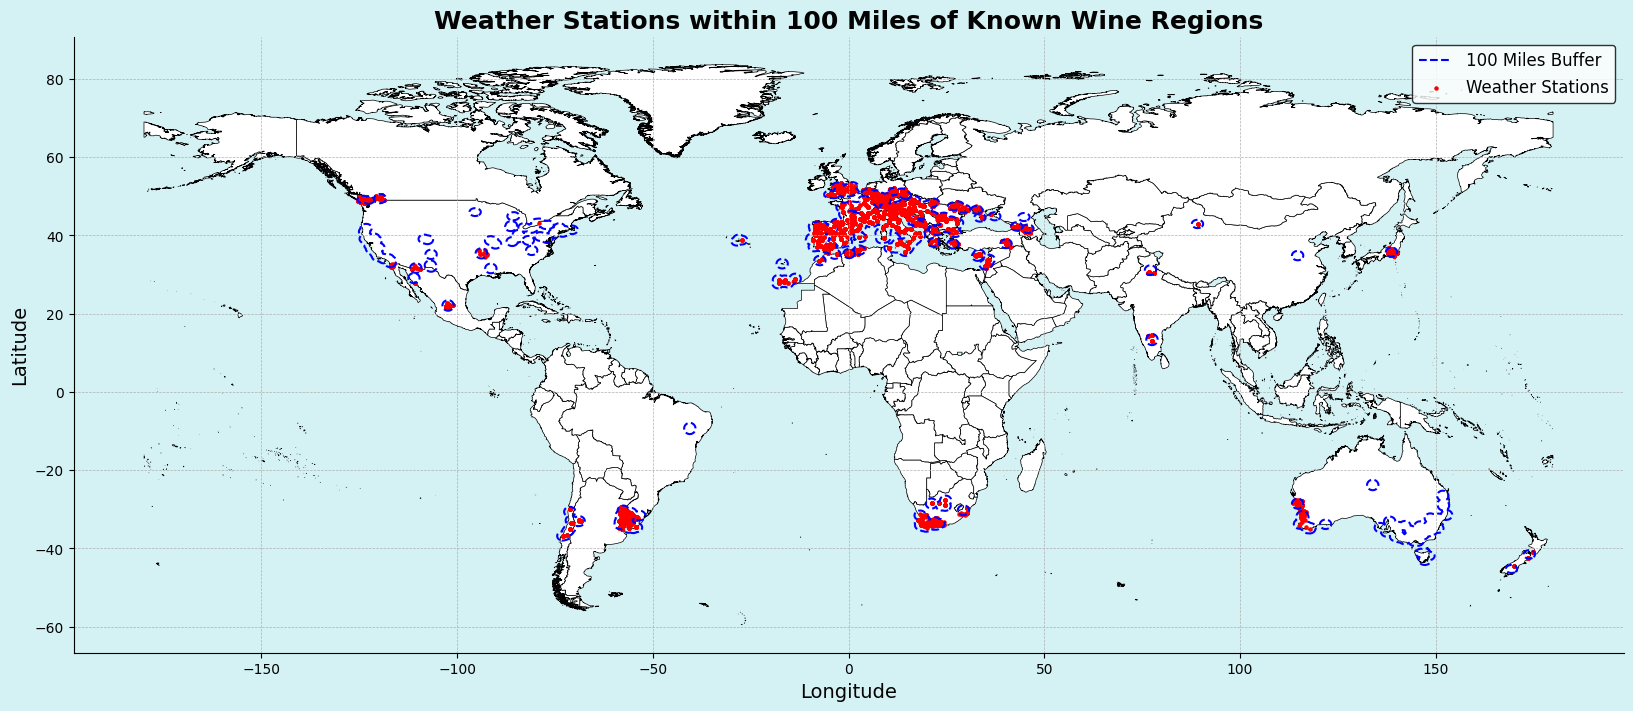

In [147]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Customizing the plot's appearance
font_family = "sans"
background_color = "#D4F1F4"
text_color = "#040303"

sns.set_style({
    "axes.facecolor": background_color,
    "figure.facecolor": background_color,
    "font.family": font_family,
    "text.color": text_color,
})

# Load the world map from the Natural Earth dataset
world_shapefile_path = 'Resources/Shapefiles/WB_countries_Admin0_10m.shp'
world = gpd.read_file(world_shapefile_path)

# Re-project world map to match the buffer zone's CRS
world = world.to_crs(epsg=4326)

# Ensure shape_buffer_geo and stations_within_buffer are also in the correct CRS
shape_buffer_geo = shape_buffer_geo.to_crs(epsg=4326)
stations_within_buffer = stations_within_buffer.to_crs(epsg=4326)

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(20, 12))

# Plot the world map with white countries
world.plot(ax=ax, color='white', edgecolor='black', linewidth=0.5)

# Plot the buffer zone
shape_buffer_geo.boundary.plot(ax=ax, color='blue', linewidth=1.5, linestyle='--', label='100 Miles Buffer')

# Plot the weather stations within the buffer
stations_within_buffer.plot(ax=ax, color='red', markersize=5, label='Weather Stations')

# Add titles and labels
plt.title('Weather Stations within 100 Miles of Known Wine Regions', fontsize=18, fontweight='bold', color=text_color)
plt.xlabel('Longitude', fontsize=14, color=text_color)
plt.ylabel('Latitude', fontsize=14, color=text_color)

# Customize legend
plt.legend(loc='upper right', fontsize=12, frameon=True, facecolor='white', edgecolor='black')

# Improve the overall aesthetics
ax.set_facecolor(background_color)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the aspect of the map to be equal
ax.set_aspect('equal')

# Save the figure with the correct file path
save_dir = "Figures"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
plt.savefig(os.path.join(save_dir, "Weather_Stations_by_Wine_Regions.png"))

# Display the plot
plt.show()


### What is the deal with Australia weather stations? Are there really no data stations for the south east of Australia?

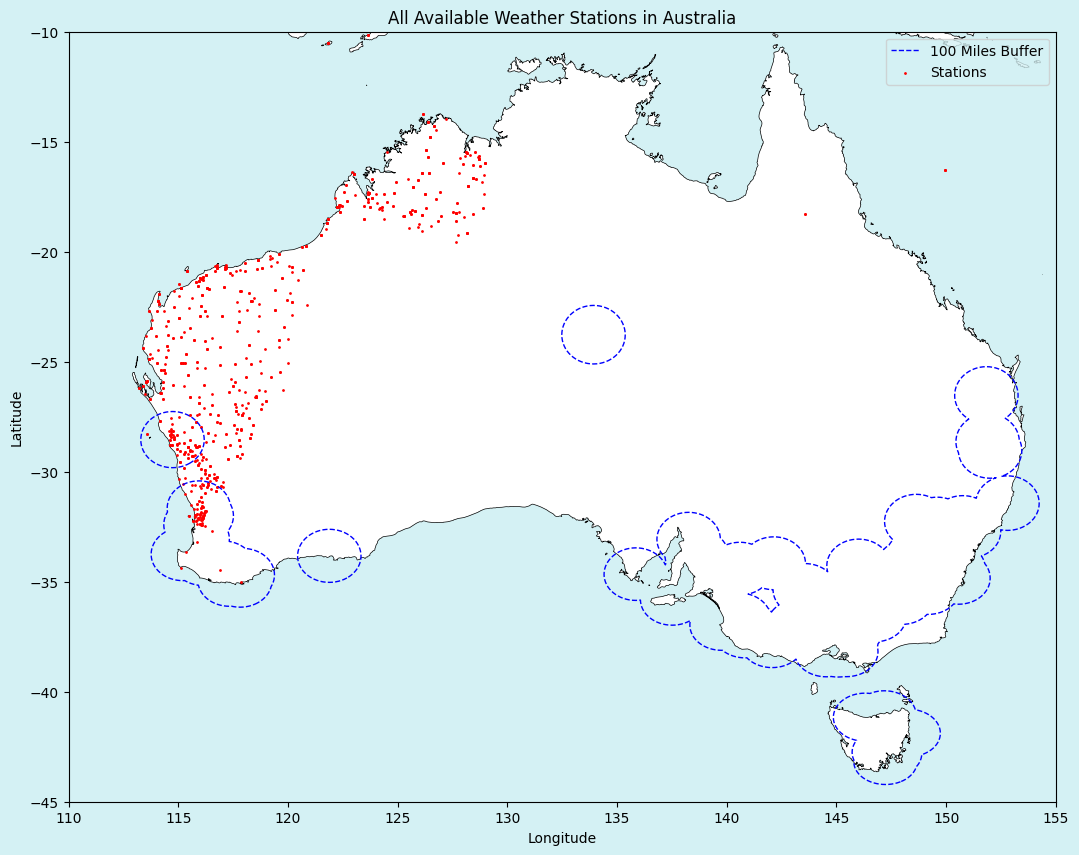

In [148]:
# Customizing the plot's appearance
font_family = "sans"
background_color = "#D4F1F4"
text_color = "#040303"

# Customizing the plot's appearance
plt.rcParams.update({
    'axes.facecolor': background_color,
    'figure.facecolor': background_color,
    'font.family': font_family,
    'text.color': text_color,
})

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(merged_df['longitude'], merged_df['latitude'])]
gdf = gpd.GeoDataFrame(merged_df, geometry=geometry)

# Set the CRS to WGS84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Load the world map 
world_shapefile_path = 'Resources/Shapefiles/WB_countries_Admin0_10m.shp'
world = gpd.read_file(world_shapefile_path)
africa = world[world.CONTINENT == "Australia"].reset_index(drop=True)

# Plot the world map, buffer, and stations within the buffer
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Plot the world map with white countries
world.plot(ax=ax, color='white', edgecolor='black', linewidth=0.5)
shape_buffer_geo.boundary.plot(ax=ax, color='blue', linewidth=1, linestyle='--', label='100 Miles Buffer')

# Plot the stations
gdf.plot(ax=ax, color='red', markersize=1, label='Stations')


# Set the limits to zoom in on Australia
ax.set_xlim(110, 155)
ax.set_ylim(-45, -10)

# Add legend and title
plt.legend()
plt.title('All Available Weather Stations in Australia')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig(os.path.join(save_dir, "Australia_Weather_Stations_with_Wine_Regions.png"))
plt.show()

### Double checking my climate file matches up with original start file

In [149]:


import pandas as pd

# Load the weather_all_country_codes3.csv file
weather_file_path = 'Resources/weather_all_country_codes3.csv'
weather_df = pd.read_csv(weather_file_path)

# Load the merged_weather_data.csv file
merged_file_path = 'Outputs/merged_weather_country_data_Station_year.csv'
merged_df = pd.read_csv(merged_file_path)

# Ensure the station identifiers are consistent (e.g., remove 'GHCND:' prefix if necessary)
weather_df['station'] = weather_df['station'].str.replace('GHCND:', '')
merged_df['station'] = merged_df['station'].str.replace('GHCND:', '')

# Calculate the number of unique station IDs in each file
unique_stations_weather = weather_df['station'].nunique()
unique_stations_merged = merged_df['station'].nunique()

print(f"Number of unique stations in weather_all_country_codes3.csv: {unique_stations_weather}")
print(f"Number of unique stations in merged_weather_data.csv: {unique_stations_merged}")


Number of unique stations in weather_all_country_codes3.csv: 6303
Number of unique stations in merged_weather_data.csv: 6303


### Identify all weather stations within 100 miles of a known wine region

In [150]:
import pandas as pd

# Load the merged weather station file
merged_file_path = 'Outputs/merged_weather_country_data_Station_year.csv'
merged_df = pd.read_csv(merged_file_path)

# Load the stations_within_buffer file
stations_within_buffer_file_path = 'Outputs/stations_within_100_miles.csv'
stations_within_buffer = pd.read_csv(stations_within_buffer_file_path)

# Load the wine data file
wine_data_file_path = 'Outputs/Wine_data_all_Production_cleaned.csv'
wine_df = pd.read_csv(wine_data_file_path)

# Ensure column names are consistent
merged_df.columns = merged_df.columns.str.lower()
stations_within_buffer.columns = stations_within_buffer.columns.str.lower()
wine_df.columns = wine_df.columns.str.lower()

# Rename 'Region/Country' to 'country' in the wine DataFrame
if 'region/country' in wine_df.columns:
    wine_df.rename(columns={'region/country': 'country'}, inplace=True)

# Print column names to verify renaming
print("Merged DataFrame columns:", merged_df.columns)
print("Stations within buffer DataFrame columns:", stations_within_buffer.columns)
print("Wine data DataFrame columns:", wine_df.columns)

# Extract unique country codes
unique_countries_wine = set(wine_df['country'].unique())
unique_countries_buffer = set(stations_within_buffer['country'].unique())

# Find countries in wine production data but not in stations within buffer
missing_countries = unique_countries_wine - unique_countries_buffer

# Filter the merged weather data for the missing countries
missing_data = merged_df[merged_df['country'].isin(missing_countries)]

# Save the missing data to a file
missing_data_file_path = 'Outputs/missing_countries_weather_data.csv'
missing_data.to_csv(missing_data_file_path, index=False)
print(f"Missing countries' weather data saved to {missing_data_file_path}")

# Add the missing countries' data back to the stations within the buffer data
updated_buffer_data = pd.concat([stations_within_buffer, missing_data])

# Save the updated buffer data
updated_buffer_file_path = 'Outputs/updated_stations_within_100_miles.csv'
updated_buffer_data.to_csv(updated_buffer_file_path, index=False)
print(f"Updated buffer data saved to {updated_buffer_file_path}")


Merged DataFrame columns: Index(['station', 'date', 'dp10', 'dp1x', 'dt32', 'dx70', 'dx90', 'emnt',
       'emxp', 'emxt', 'htdd', 'mnpn', 'mxpn', 'prcp', 'tavg', 'tmax', 'code',
       'latitude', 'longitude', 'elevation', 'location', 'country'],
      dtype='object')
Stations within buffer DataFrame columns: Index(['station', 'date', 'dp10', 'dp1x', 'dt32', 'dx70', 'dx90', 'emnt',
       'emxp', 'emxt', 'htdd', 'mnpn', 'mxpn', 'prcp', 'tavg', 'tmax', 'code',
       'latitude', 'longitude', 'elevation', 'location', 'country',
       'geometry'],
      dtype='object')
Wine data DataFrame columns: Index(['continent', 'country', 'product', 'variable', 'year', 'unit',
       'quantity', 'quantity_gallons', 'country_code'],
      dtype='object')
Missing countries' weather data saved to Outputs/missing_countries_weather_data.csv
Updated buffer data saved to Outputs/updated_stations_within_100_miles.csv


### Clean up weather station data to have only an averaged data value for each country by year. 

In [151]:

# Load the CSV file
file_path = 'Outputs/updated_stations_within_100_miles.csv'
data = pd.read_csv(file_path)

# Specify the columns to average and calculate standard deviation
columns_to_average = ['dp10', 'dp1x', 'dt32', 'dx70', 'dx90', 'emnt', 'emxp', 'emxt', 'htdd', 'mnpn', 'mxpn', 'prcp', 'tavg', 'tmax']

# Group by 'country' and 'date', then calculate the mean and standard deviation
grouped_data = data.groupby(['country', 'date'])[columns_to_average].agg(['mean', 'std']).reset_index()

# Flatten the column names
grouped_data.columns = ['_'.join(col).strip('_') for col in grouped_data.columns.values]

# Save the cleaned and grouped data to a new CSV file if needed
output_path = 'Outputs/averages_updated_100_mile_stations.csv'
grouped_data.to_csv(output_path, index=False)

# Display the cleaned and grouped data
grouped_data


,country,date,dp10_mean,dp10_std,dp1x_mean,dp1x_std,dt32_mean,dt32_std,dx70_mean,dx70_std,...,mnpn_mean,mnpn_std,mxpn_mean,mxpn_std,prcp_mean,prcp_std,tavg_mean,tavg_std,tmax_mean,tmax_std
0,Albania,1995,97.000000,NaN,29.000000,NaN,NaN,NaN,160.0,NaN,...,NaN,NaN,NaN,NaN,90.820000,NaN,NaN,NaN,66.9,NaN
1,Albania,1996,101.000000,NaN,30.000000,NaN,NaN,NaN,173.0,NaN,...,NaN,NaN,NaN,NaN,92.590000,NaN,NaN,NaN,68.7,NaN
2,Albania,1997,70.000000,NaN,16.000000,NaN,NaN,NaN,161.0,NaN,...,NaN,NaN,NaN,NaN,57.740000,NaN,NaN,NaN,68.7,NaN
3,Albania,1999,91.000000,NaN,24.000000,NaN,NaN,NaN,188.0,NaN,...,NaN,NaN,NaN,NaN,72.340000,NaN,NaN,NaN,71.3,NaN
4,Albania,2000,70.000000,NaN,23.000000,NaN,NaN,NaN,185.0,NaN,...,NaN,NaN,NaN,NaN,69.220000,NaN,NaN,NaN,71.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,Vietnam,2019,70.285714,20.572751,17.285714,7.825477,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,56.551429,18.578469,NaN,NaN,NaN,NaN
2139,Vietnam,2020,71.285714,16.908719,17.714286,8.826367,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,62.635714,26.536631,NaN,NaN,NaN,NaN
2140,Vietnam,2021,77.000000,6.055301,21.250000,8.845903,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,72.560000,28.564926,NaN,NaN,NaN,NaN
2141,Vietnam,2022,128.000000,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,105.860000,NaN,NaN,NaN,NaN,NaN


### Merge Wine production data with cleaned accounting for region weather data

In [152]:
import pandas as pd

# Load the two CSV files
wine_data = pd.read_csv('Outputs/Wine_data_all_Production_cleaned.csv')
weather_data = pd.read_csv('Outputs/averages_updated_100_mile_stations.csv')

# Rename columns to prepare for merging
wine_data.rename(columns={'Region/Country': 'country', 'Year': 'year'}, inplace=True)
weather_data.rename(columns={'date': 'year'}, inplace=True)

# Merging the datasets on the 'country' column
merged_data = pd.merge(wine_data, weather_data, on=['country', 'year'], how='outer')

# Remove the specified columns
columns_to_remove = ['Continent', 'Variable', 'Unit', 'Product']
data_cleaned = merged_data.drop(columns=columns_to_remove)
# Rename the 'Quantity' column to 'Quantity_Hl'
data_cleaned.rename(columns={'Quantity': 'Quantity_hl'}, inplace=True)

# Save the final merged dataframe to a CSV file
output_path = 'Outputs/merged_wine_weather_for_regions_data.csv'
data_cleaned.to_csv(output_path, index=False)

# Identify unmatched wine data
# Extract country columns
merged_countries = weather_data['country'].unique()
wine_data_all_countries = wine_data['country'].unique()

# Convert to sets for easy comparison
merged_countries_set = set(merged_countries)
wine_data_all_countries_set = set(wine_data_all_countries)

# Find common and unique countries
common_countries = merged_countries_set & wine_data_all_countries_set
unique_to_merged = merged_countries_set - wine_data_all_countries_set
unique_to_wine_data_all = wine_data_all_countries_set - merged_countries_set

# Count the countries in each category
common_countries_count = len(common_countries)
unique_to_merged_count = len(unique_to_merged)
unique_to_wine_data_all_count = len(unique_to_wine_data_all)

# Results
print("Countries present in both datasets:", common_countries_count)
print("Countries unique to the weather:", unique_to_merged_count)
print("Countries unique to the wine data all dataset:", unique_to_wine_data_all_count)

# Lists of unique countries
unique_to_merged_countries = list(unique_to_merged)
unique_to_wine_data_all_countries = list(unique_to_wine_data_all)

print("Countries unique to the weather dataset:", unique_to_merged_countries)
print("Countries unique to the wine data all dataset:", unique_to_wine_data_all_countries)


Countries present in both datasets: 125
Countries unique to the weather: 9
Countries unique to the wine data all dataset: 88
Countries unique to the weather dataset: ['India', 'Luxembourg', 'Syria', 'Turkey', 'Gibraltar', 'Netherlands', 'China', 'Macedonia', 'Montenegro']
Countries unique to the wine data all dataset: ['Yemen', 'Brunei Darussalam', 'Tuvalu', 'Barbados', 'Serbia And Montenegro', 'Luxemburg', 'Congo (the Democratic Republic of the)', 'Comoros', 'Haiti', 'State of Palestine', 'Cabo Verde', 'Djibouti', 'South Sudan', 'Zimbabwe', 'Afghanistan', 'Dominica', 'Sao Tome and Principe', 'Angola', 'Virgin Islands', 'Eswatini', 'Belgium and Luxemburg', 'Burundi', 'Bahrain', 'Antigua and Barbuda', 'China, Hong Kong SAR', 'Chad', 'Korea (the Republic of)', "Korea (the Democratic People's Republic of)", 'Tanzania, the United Republic of', 'Monaco', 'Republic of North Macedonia', 'Zambia', 'Nicaragua', 'Lesotho', 'Timor-Leste', 'Reunion island', 'Cook Islands', 'Andorra', 'Mauritania',

# Weather by Region Analysis

In [153]:
#Region data set
file_path = 'Outputs/merged_wine_weather_for_regions_data.csv'
region_data_all = pd.read_csv(file_path)

# Max temperature
# We only care about data that is not NaN
r_tmax_ww_df = region_data_all[region_data_all['tmax_mean'].notna()]

r_tmax_ww_df.head()

,country,year,Quantity_hl,Quantity_gallons,Country_Code,dp10_mean,dp10_std,dp1x_mean,dp1x_std,dt32_mean,...,mnpn_mean,mnpn_std,mxpn_mean,mxpn_std,prcp_mean,prcp_std,tavg_mean,tavg_std,tmax_mean,tmax_std
1,Albania,1995,169.0,4464506.8,AL,97.0,NaN,29.0,NaN,NaN,...,NaN,NaN,NaN,NaN,90.82,NaN,NaN,NaN,66.9,NaN
2,Albania,1996,NaN,NaN,NaN,101.0,NaN,30.0,NaN,NaN,...,NaN,NaN,NaN,NaN,92.59,NaN,NaN,NaN,68.7,NaN
3,Albania,1997,NaN,NaN,NaN,70.0,NaN,16.0,NaN,NaN,...,NaN,NaN,NaN,NaN,57.74,NaN,NaN,NaN,68.7,NaN
4,Albania,1999,NaN,NaN,NaN,91.0,NaN,24.0,NaN,NaN,...,NaN,NaN,NaN,NaN,72.34,NaN,NaN,NaN,71.3,NaN
5,Albania,2000,NaN,NaN,NaN,70.0,NaN,23.0,NaN,NaN,...,NaN,NaN,NaN,NaN,69.22,NaN,NaN,NaN,71.5,NaN


Dropdown(description='Country:', index=70, options=('Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'An…

Dropdown(description='Weather Params:', index=2, options=('tmax_mean', 'prcp_mean', 'tavg_mean', 'emxt_mean', …

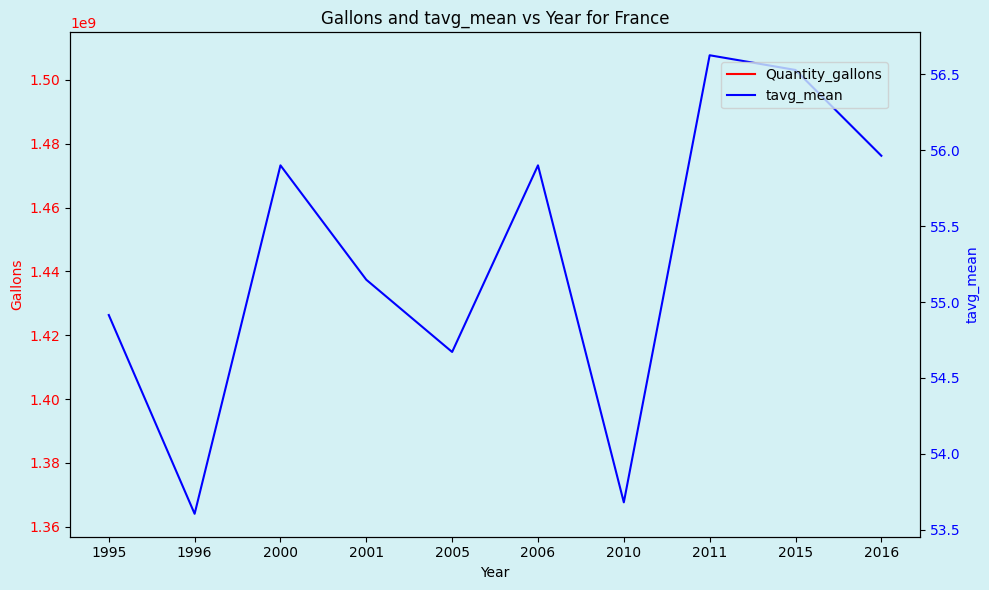

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Assuming region_data_all is already loaded
# Convert 'year' to string format if it's not already
region_data_all['year'] = region_data_all['year'].astype(str).str[:4]

# Unique countries for the dropdown
countries = region_data_all['country'].unique()
weather_params = ['tmax_mean', 'prcp_mean', 'tavg_mean', 'emxt_mean', 'emnt_mean']

# Create a dropdown widget for country selection
country_widget = widgets.Dropdown(
    options=countries,
    description='Country:',
    value='France',  # Set a default value
    disabled=False,
)

# Create a dropdown widget for weather parameters
weather_params_widget = widgets.Dropdown(
    options=weather_params,
    description='Weather Params:',
    value='tavg_mean',  # Set a default value
    disabled=False,
)

# Function to update the plot based on the selected country
def update_plot(change=None):
    clear_output(wait=True)
    display(country_widget, weather_params_widget)

    country = country_widget.value
    weather_param = weather_params_widget.value

    # Filter the dataframe
    weather_df = region_data_all[region_data_all[weather_param].notna()]
    filtered_df = weather_df[weather_df['country'] == country]

    if filtered_df.empty:
        print(f"No data available for {country} with parameter {weather_param}")
        return

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plotting Gallons vs Year on the primary y-axis
    ax1.plot(filtered_df['year'], filtered_df['Quantity_gallons'], color='red', label='Quantity_gallons')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Gallons', color='red')
    ax1.tick_params(axis='y', labelcolor='red')

    # Create a second y-axis sharing the same x-axis
    ax2 = ax1.twinx()
    ax2.plot(filtered_df['year'], filtered_df[weather_param], color='blue', label=weather_param)
    ax2.set_ylabel(weather_param, color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Adding titles
    plt.title(f'Gallons and {weather_param} vs Year for {country}')

    # Adding legends
    fig.tight_layout()  # Adjust layout to fit both y-axis labels
    fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))
    plt.show()

# Observe changes in the dropdown and update the plot accordingly
country_widget.observe(update_plot, names='value')
weather_params_widget.observe(update_plot, names='value')

# Display the widgets
display(country_widget, weather_params_widget)

# Initial plot
update_plot()


# 3. What is the correlation between temperature and wine production?

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Ensure 'year' column is in the correct format
region_data_all['year'] = region_data_all['year'].astype(str).str[:4].astype(int)

# Copy the dataframe and filter for France ('FR')
fr_data = region_data_all.copy()
fr_data = fr_data[fr_data['Country_Code'] == 'FR'] 

# Convert Gallons to millions
fr_data['Quantity_gallons'] = fr_data['Quantity_gallons'] / 1e6
yearly_production = fr_data

# Check for missing values in the columns used for regression
print("Missing values in 'year':", yearly_production['year'].isna().sum())
print("Missing values in 'Gallons':", yearly_production['Quantity_gallons'].isna().sum())
print("Missing values in 'tmax_mean':", yearly_production['tmax_mean'].isna().sum())

# Ensure there are no missing values
yearly_production = yearly_production.dropna(subset=['year', 'Quantity_gallons', 'tmax_mean'])

# Ensure there are at least two data points for regression
if len(yearly_production) < 2:
    print("Not enough data points for regression.")
else:
    # Calculate the linear regression for Gallons over the Years
    slope_gallons, intercept_gallons, r_value_gallons, p_value_gallons, std_err_gallons = linregress(yearly_production['year'], yearly_production['Gallons'])

    # Calculate the linear regression for Temperature over the Years
    slope_temp, intercept_temp, r_value_temp, p_value_temp, std_err_temp = linregress(yearly_production['year'], yearly_production['tmax_mean'])

    # Generate the regression lines
    regression_line_gallons = intercept_gallons + slope_gallons * yearly_production['year']
    regression_line_temp = intercept_temp + slope_temp * yearly_production['year']

    # Debug statements to ensure the regression lines are calculated
    print("Gallons Regression Line:", regression_line_gallons)
    print("Temperature Regression Line:", regression_line_temp)

    # Plotting
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot gallons data and regression line
    ax1.scatter(yearly_production['year'], yearly_production['Quantity_gallons'], label='Gallons', color='blue')
    ax1.plot(yearly_production['year'], regression_line_gallons, color='blue', linestyle='--', label='Gallons Regression Line')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Gallons', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a second y-axis for temperature
    ax2 = ax1.twinx()
    ax2.scatter(yearly_production['year'], yearly_production['tmax_mean'], label='Temperature', color='red')
    ax2.plot(yearly_production['year'], regression_line_temp, color='red', linestyle='--', label='Temperature Regression Line')
    ax2.set_ylabel('Temperature (°F)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Add title and grid
    plt.title('Gallons and Temperature over the Years with Regression Lines')
    fig.tight_layout()
    plt.grid(True)

    # Combine legends from both y-axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='best')

    plt.show()

    # Print the regression statistics for gallons
    print("Gallons Regression:")
    print(f"Slope: {slope_gallons}")
    print(f"Intercept: {intercept_gallons}")
    print(f"R-squared: {r_value_gallons**2}")
    print(f"P-value: {p_value_gallons}")
    print(f"Standard error: {std_err_gallons}")

    # Print the regression statistics for temperature
    print("\nTemperature Regression:")
    print(f"Slope: {slope_temp}")
    print(f"Intercept: {intercept_temp}")
    print(f"R-squared: {r_value_temp**2}")
    print(f"P-value: {p_value_temp}")
    print(f"Standard error: {std_err_temp}")


Missing values in 'year': 0
Missing values in 'Gallons': 0
Missing values in 'tmax_mean': 0
Not enough data points for regression.


### Are there any correlations in weather parameters and prouction?

In [156]:
import pandas as pd

# Load the datasets
wine_weather_data = pd.read_csv('Outputs/merged_wine_weather_for_regions_data.csv')
glossary = pd.read_csv('Resources/DataType_Glossary.csv')

# Display the first few rows of each dataset to understand their structure
print(wine_weather_data.head())
print(glossary.head())

# Data cleaning and preparation
wine_weather_data_clean = wine_weather_data.dropna(subset=['Quantity_gallons'])

# Selecting relevant weather columns for correlation analysis
weather_columns = ['dp10_mean', 'dp1x_mean', 'dt32_mean', 'dx70_mean', 'dx90_mean',
                   'emxp_mean', 'prcp_mean', 'tavg_mean', 'tmax_mean']

# Ensure all weather columns exist in the dataset
weather_columns = [col for col in weather_columns if col in wine_weather_data_clean.columns]

# Calculate correlation coefficients
correlations = wine_weather_data_clean[['Quantity_gallons'] + weather_columns].corr()

# Extract the correlations of Quantity_gallons with weather columns
quantity_gallons_corr = correlations['Quantity_gallons'].drop('Quantity_gallons')

quantity_gallons_corr


       country  year  Quantity_hl  Quantity_gallons Country_Code  dp10_mean  \
0  Afghanistan  1995          0.0               0.0           AF        NaN   
1      Albania  1995        169.0         4464506.8           AL       97.0   
2      Albania  1996          NaN               NaN          NaN      101.0   
3      Albania  1997          NaN               NaN          NaN       70.0   
4      Albania  1999          NaN               NaN          NaN       91.0   

   dp10_std  dp1x_mean  dp1x_std  dt32_mean  ...  mnpn_mean  mnpn_std  \
0       NaN        NaN       NaN        NaN  ...        NaN       NaN   
1       NaN       29.0       NaN        NaN  ...        NaN       NaN   
2       NaN       30.0       NaN        NaN  ...        NaN       NaN   
3       NaN       16.0       NaN        NaN  ...        NaN       NaN   
4       NaN       24.0       NaN        NaN  ...        NaN       NaN   

   mxpn_mean  mxpn_std  prcp_mean  prcp_std  tavg_mean  tavg_std  tmax_mean  \
0      

dp10_mean   -0.059662
dp1x_mean   -0.104567
dt32_mean   -0.016122
dx70_mean   -0.169015
dx90_mean   -0.155401
emxp_mean   -0.064162
prcp_mean   -0.084916
tavg_mean   -0.108671
tmax_mean   -0.132660
Name: Quantity_gallons, dtype: float64

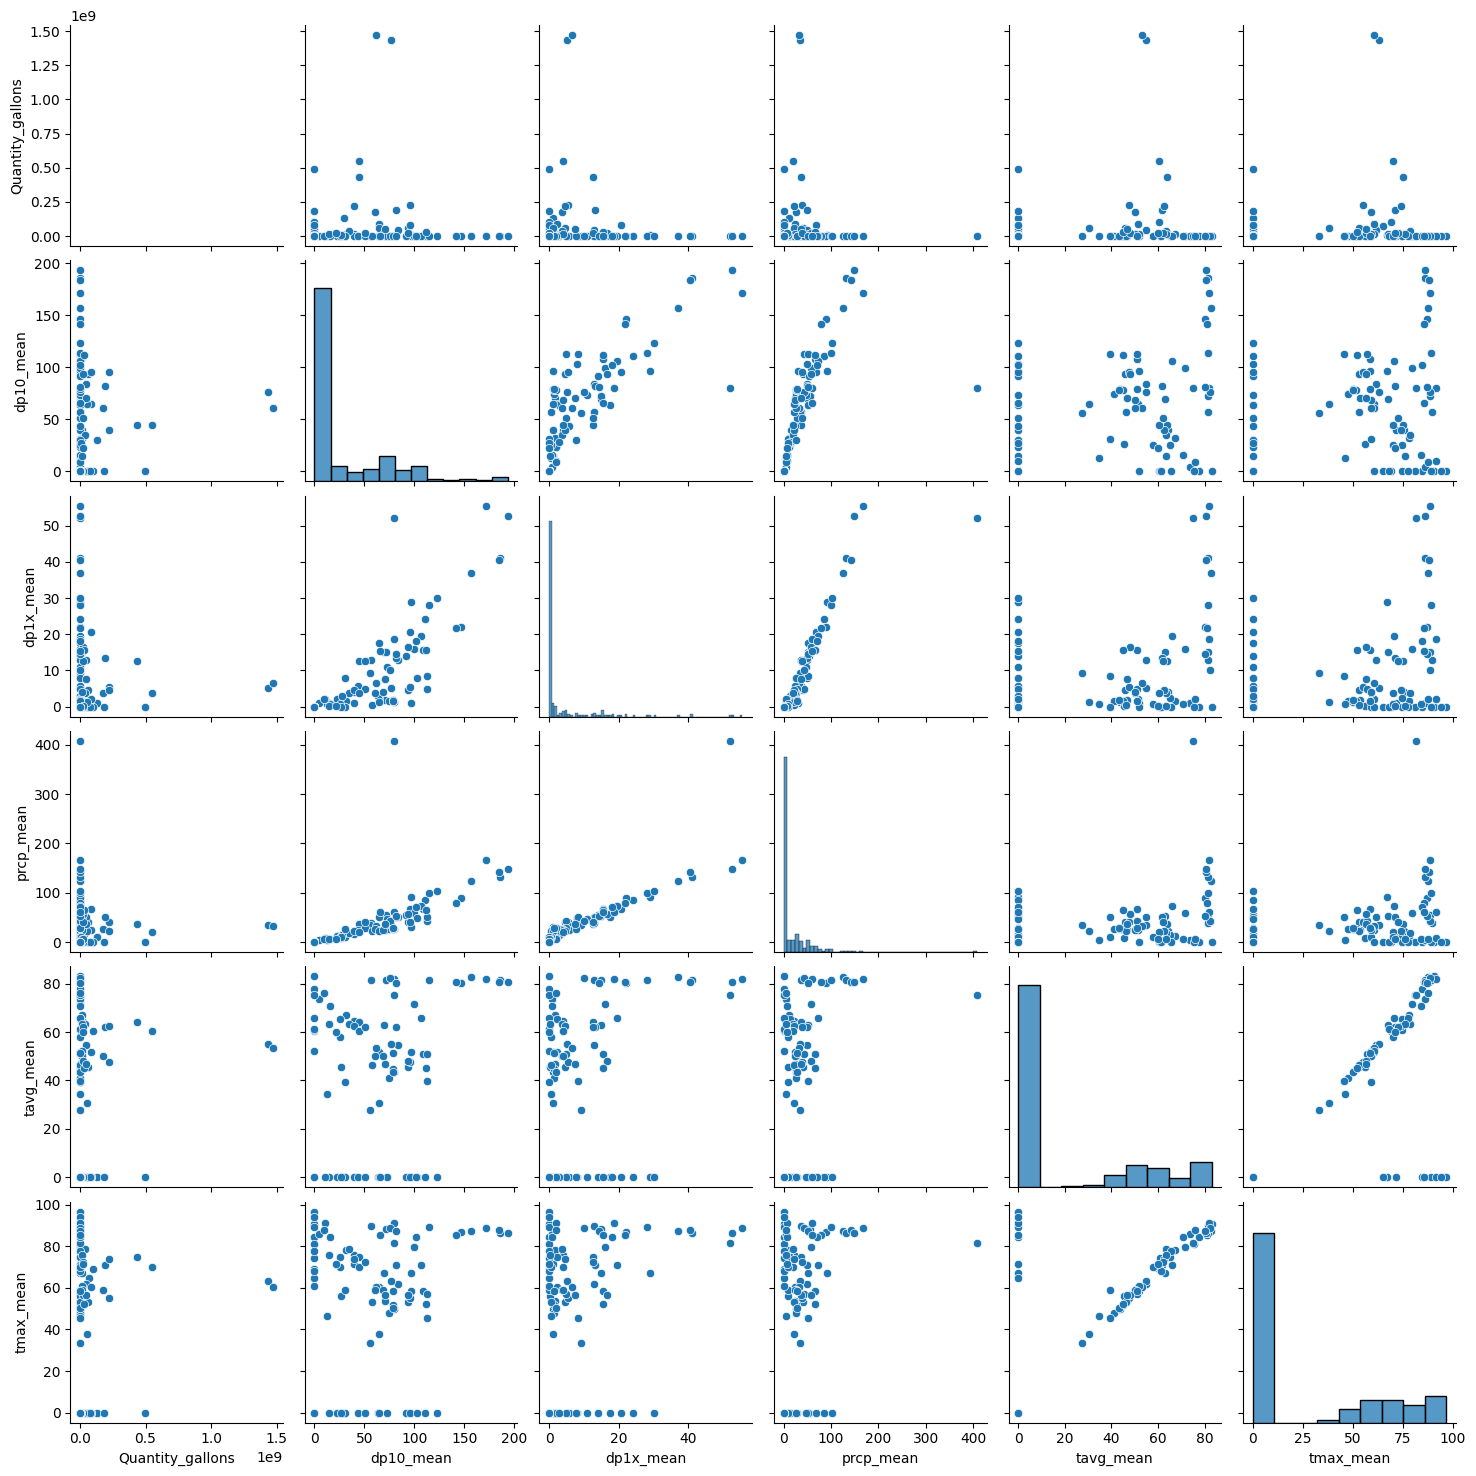

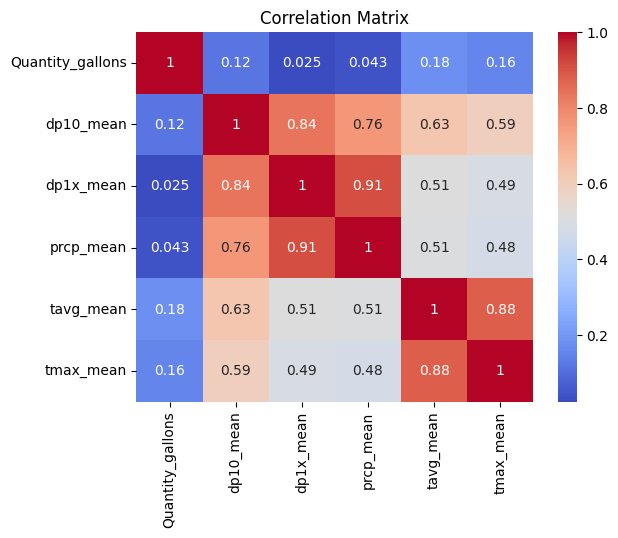

                            OLS Regression Results                            
Dep. Variable:       Quantity_gallons   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.164
Date:                Wed, 19 Jun 2024   Prob (F-statistic):             0.0594
Time:                        20:15:42   Log-Likelihood:                -4312.1
No. Observations:                 213   AIC:                             8636.
Df Residuals:                     207   BIC:                             8656.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        9.78e+06   1.32e+07      0.741      0.4

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load the data
wine_weather_data = pd.read_csv('Outputs/merged_wine_weather_for_regions_data.csv')

# Clean the data: handle missing values, ensure data types are correct
wine_weather_data.dropna(subset=['Quantity_gallons'], inplace=True)
wine_weather_data.fillna(0, inplace=True)

# Select relevant columns
relevant_columns = ['Quantity_gallons', 'dp10_mean', 'dp1x_mean', 'prcp_mean', 'tavg_mean', 'tmax_mean']
data = wine_weather_data[relevant_columns]

# Visualize the data
sns.pairplot(data)
plt.show()

# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Linear regression model
X = data[['dp10_mean', 'dp1x_mean', 'prcp_mean', 'tavg_mean', 'tmax_mean']]
y = data['Quantity_gallons']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Model summary
print(model.summary())


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data again for clarity
wine_weather_data = pd.read_csv('Outputs/merged_wine_weather_for_regions_data.csv')

# Filter the data for the years 1995 to 2023
filtered_data = wine_weather_data[(wine_weather_data['year'] >= 1995) & (wine_weather_data['year'] <= 2023)]

# Verify the number of records per country and year
records_per_country_year = filtered_data.groupby(['country', 'year']).size().reset_index(name='counts')
print(records_per_country_year.head())

# Check unique years per country
unique_years_per_country = filtered_data.groupby('country')['year'].nunique().reset_index(name='unique_years')
print(unique_years_per_country.head())

# Filter countries with insufficient records
sufficient_records_countries = unique_years_per_country[unique_years_per_country['unique_years'] > 1]['country']
filtered_data_sufficient = filtered_data[filtered_data['country'].isin(sufficient_records_countries)]

# Inspect the filtered data to ensure it's non-empty
print(filtered_data_sufficient.head())

# Recompute year-over-year differences
filtered_data_sufficient['Quantity_gallons_diff'] = filtered_data_sufficient.groupby('country')['Quantity_gallons'].diff()
filtered_data_sufficient['dp10_mean_diff'] = filtered_data_sufficient.groupby('country')['dp10_mean'].diff()
filtered_data_sufficient['dp1x_mean_diff'] = filtered_data_sufficient.groupby('country')['dp1x_mean'].diff()
filtered_data_sufficient['prcp_mean_diff'] = filtered_data_sufficient.groupby('country')['prcp_mean'].diff()
filtered_data_sufficient['tavg_mean_diff'] = filtered_data_sufficient.groupby('country')['tavg_mean'].diff()
filtered_data_sufficient['tmax_mean_diff'] = filtered_data_sufficient.groupby('country')['tmax_mean'].diff()

# Select relevant columns for analysis
diff_columns = ['Quantity_gallons_diff', 'dp10_mean_diff', 'dp1x_mean_diff', 'prcp_mean_diff', 'tavg_mean_diff', 'tmax_mean_diff']
data_diff_sufficient = filtered_data_sufficient[diff_columns]

# Inspect year-over-year differences to ensure they are computed correctly
print(data_diff_sufficient.head())

# Drop rows with missing values
data_diff_sufficient = data_diff_sufficient.dropna()

# Ensure there are no remaining NaNs
missing_values_sufficient = data_diff_sufficient.isnull().sum()
print(missing_values_sufficient)

# Check for any zero-size arrays
print(data_diff_sufficient.shape)

# Proceed with the analysis if data is clean
if data_diff_sufficient.isnull().sum().sum() == 0 and data_diff_sufficient.shape[0] > 0:
    # Visualize the data
    sns.pairplot(data_diff_sufficient)
    plt.show()

    # Correlation matrix for year-over-year changes
    correlation_matrix_diff = data_diff_sufficient.corr()
    sns.heatmap(correlation_matrix_diff, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix of Year-over-Year Changes')
    plt.show()

    # Linear regression model for year-over-year changes
    X_diff = data_diff_sufficient[['dp10_mean_diff', 'dp1x_mean_diff', 'prcp_mean_diff', 'tavg_mean_diff', 'tmax_mean_diff']]
    y_diff = data_diff_sufficient['Quantity_gallons_diff']

    # Add a constant to the model (intercept)
    X_diff = sm.add_constant(X_diff)

    # Fit the model
    model_diff = sm.OLS(y_diff, X_diff).fit()

    # Model summary
    model_summary_diff = model_diff.summary()

    print(model_summary_diff)
else:
    print("Data still contains missing values or has zero-size arrays.")


       country  year  counts
0  Afghanistan  1995       1
1      Albania  1995       1
2      Albania  1996       1
3      Albania  1997       1
4      Albania  1999       1
          country  unique_years
0     Afghanistan             1
1         Albania             6
2         Algeria            23
3  American Samoa             5
4         Andorra             1
   country  year  Quantity_hl  Quantity_gallons Country_Code  dp10_mean  \
1  Albania  1995        169.0         4464506.8           AL       97.0   
2  Albania  1996          NaN               NaN          NaN      101.0   
3  Albania  1997          NaN               NaN          NaN       70.0   
4  Albania  1999          NaN               NaN          NaN       91.0   
5  Albania  2000          NaN               NaN          NaN       70.0   

   dp10_std  dp1x_mean  dp1x_std  dt32_mean  ...  mnpn_mean  mnpn_std  \
1       NaN       29.0       NaN        NaN  ...        NaN       NaN   
2       NaN       30.0       NaN     

/var/folders/_d/q6dl733j0hdfhxbg883rg3xc0000gn/T/ipykernel_9806/3657425342.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_sufficient['Quantity_gallons_diff'] = filtered_data_sufficient.groupby('country')['Quantity_gallons'].diff()
/var/folders/_d/q6dl733j0hdfhxbg883rg3xc0000gn/T/ipykernel_9806/3657425342.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_sufficient['dp10_mean_diff'] = filtered_data_sufficient.groupby('country')['dp10_mean'].diff()
/var/folders/_d/q6dl733j

                            OLS Regression Results                            
Dep. Variable:       Quantity_gallons   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.257
Date:                Wed, 19 Jun 2024   Prob (F-statistic):              0.287
Time:                        20:33:30   Log-Likelihood:                -4316.3
No. Observations:                 213   AIC:                             8639.
Df Residuals:                     210   BIC:                             8649.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               2.38e+07   2.46e+0

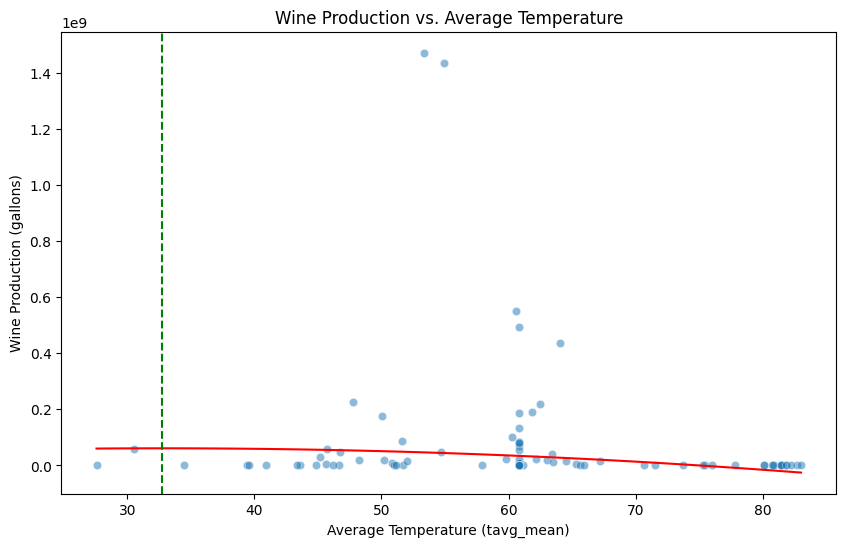

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
wine_weather_data = pd.read_csv('Outputs/merged_wine_weather_for_regions_data.csv')

# Filter the data for the years 1995 to 2023
filtered_data = wine_weather_data[(wine_weather_data['year'] >= 1995) & (wine_weather_data['year'] <= 2023)]

# Drop rows with missing production values
filtered_data = filtered_data.dropna(subset=['Quantity_gallons'])

# Fill missing values in weather data with the mean of the respective column
weather_columns = ['dp10_mean', 'dp1x_mean', 'prcp_mean', 'tavg_mean', 'tmax_mean']
filtered_data[weather_columns] = filtered_data[weather_columns].fillna(filtered_data[weather_columns].mean())

# Create a quadratic term for average temperature
filtered_data['tavg_mean_squared'] = filtered_data['tavg_mean'] ** 2

# Select relevant columns for the regression model
X = filtered_data[['tavg_mean', 'tavg_mean_squared']]
y = filtered_data['Quantity_gallons']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
quadratic_model = sm.OLS(y, X).fit()

# Model summary
print(quadratic_model.summary())

# Calculate the optimal temperature
optimal_temperature = -quadratic_model.params['tavg_mean'] / (2 * quadratic_model.params['tavg_mean_squared'])
print(f"The optimal average temperature for maximum production is approximately {optimal_temperature:.2f} degrees.")

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tavg_mean', y='Quantity_gallons', data=filtered_data, alpha=0.5)
tavg_mean_range = np.linspace(filtered_data['tavg_mean'].min(), filtered_data['tavg_mean'].max(), 100)
predicted_production = quadratic_model.predict(sm.add_constant(pd.DataFrame({
    'tavg_mean': tavg_mean_range,
    'tavg_mean_squared': tavg_mean_range ** 2
})))
plt.plot(tavg_mean_range, predicted_production, color='red')
plt.axvline(x=optimal_temperature, color='green', linestyle='--')
plt.title('Wine Production vs. Average Temperature')
plt.xlabel('Average Temperature (tavg_mean)')
plt.ylabel('Wine Production (gallons)')
plt.show()


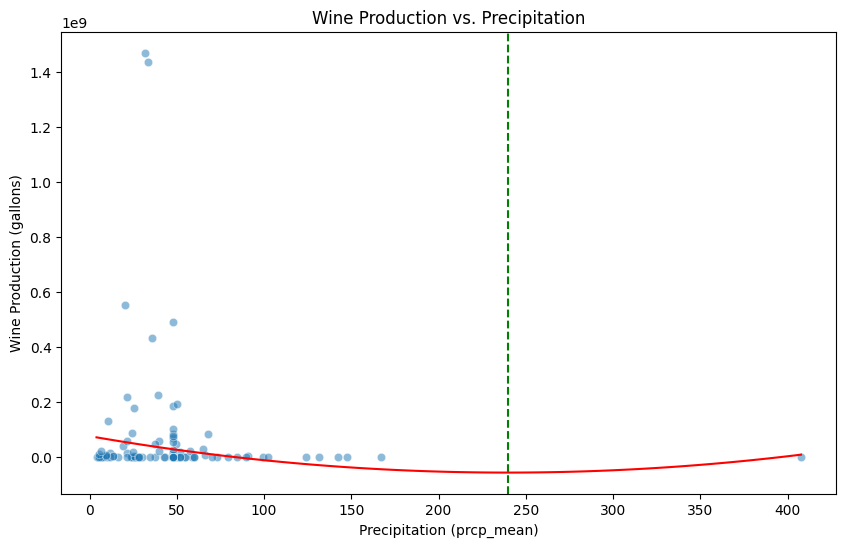

(239.60788782670352,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:       Quantity_gallons   R-squared:                       0.013
 Model:                            OLS   Adj. R-squared:                  0.003
 Method:                 Least Squares   F-statistic:                     1.369
 Date:                Wed, 19 Jun 2024   Prob (F-statistic):              0.257
 Time:                        20:36:30   Log-Likelihood:                -4316.2
 No. Observations:                 213   AIC:                             8638.
 Df Residuals:                     210   BIC:                             8648.
 Df Model:                           2                                         
 Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
 -----------------------------------------

In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data again for clarity
wine_weather_data = pd.read_csv('Outputs/merged_wine_weather_for_regions_data.csv')

# Filter the data for the years 1995 to 2023
filtered_data = wine_weather_data[(wine_weather_data['year'] >= 1995) & (wine_weather_data['year'] <= 2023)]

# Drop rows with missing production values
filtered_data = filtered_data.dropna(subset=['Quantity_gallons'])

# Fill missing values in weather data with the mean of the respective column
weather_columns = ['dp10_mean', 'dp1x_mean', 'prcp_mean', 'tavg_mean', 'tmax_mean']
filtered_data[weather_columns] = filtered_data[weather_columns].fillna(filtered_data[weather_columns].mean())

# Create a quadratic term for precipitation
filtered_data['prcp_mean_squared'] = filtered_data['prcp_mean'] ** 2

# Select relevant columns for the regression model
X = filtered_data[['prcp_mean', 'prcp_mean_squared']]
y = filtered_data['Quantity_gallons']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
quadratic_model = sm.OLS(y, X).fit()

# Model summary
model_summary = quadratic_model.summary()

# Calculate the optimal precipitation
optimal_precipitation = -quadratic_model.params['prcp_mean'] / (2 * quadratic_model.params['prcp_mean_squared'])

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='prcp_mean', y='Quantity_gallons', data=filtered_data, alpha=0.5)
prcp_mean_range = np.linspace(filtered_data['prcp_mean'].min(), filtered_data['prcp_mean'].max(), 100)
predicted_production = quadratic_model.predict(sm.add_constant(pd.DataFrame({
    'prcp_mean': prcp_mean_range,
    'prcp_mean_squared': prcp_mean_range ** 2
})))
plt.plot(prcp_mean_range, predicted_production, color='red')
plt.axvline(x=optimal_precipitation, color='green', linestyle='--')
plt.title('Wine Production vs. Precipitation')
plt.xlabel('Precipitation (prcp_mean)')
plt.ylabel('Wine Production (gallons)')
plt.show()

optimal_precipitation, model_summary


                            OLS Regression Results                            
Dep. Variable:       Quantity_gallons   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9044
Date:                Wed, 19 Jun 2024   Prob (F-statistic):              0.462
Time:                        20:42:46   Log-Likelihood:                -4315.7
No. Observations:                 213   AIC:                             8641.
Df Residuals:                     208   BIC:                             8658.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.728e+07   2.48e+0

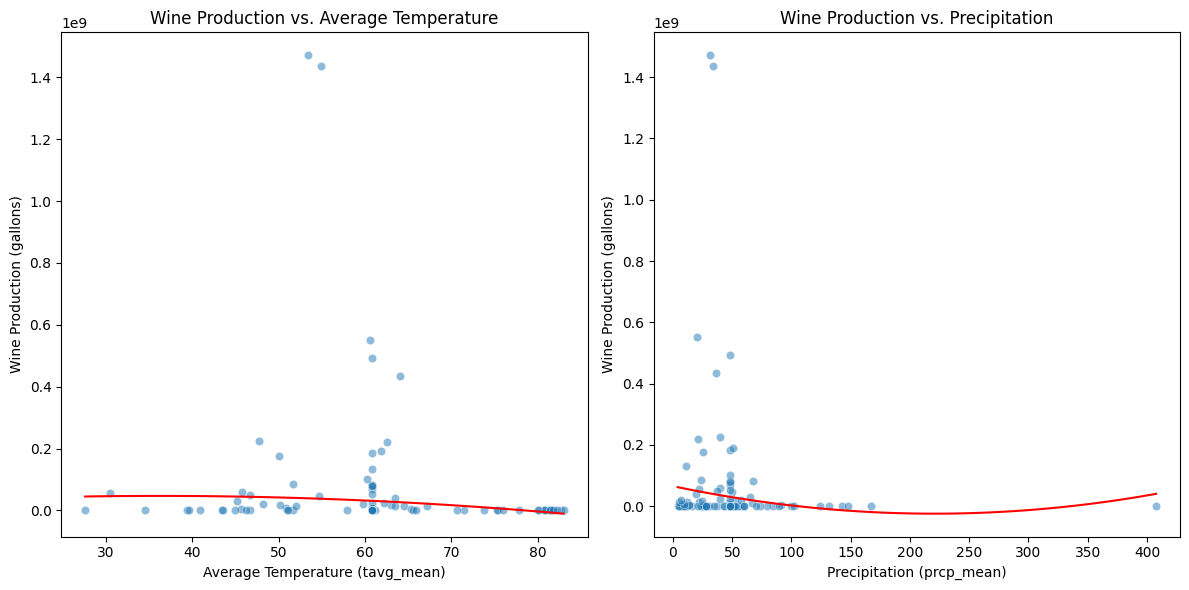

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Quantity_gallons   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9044
Date:                Wed, 19 Jun 2024   Prob (F-statistic):              0.462
Time:                        20:42:46   Log-Likelihood:                -4315.7
No. Observations:                 213   AIC:                             8641.
Df Residuals:                     208   BIC:                             8658.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.728e+07   2.48e+08      0.191      0.849   -4.41e+08    5.36e+08
tavg_mean          1.894e+06   8.05e+06      0.235      0.814    -1.4e+07    1.78e+07
tavg_mean_squared -2.618e+04   6.66e+04     -0.393      0.695   -1.57e+05    1.05e+05
prcp_mean         -8.135e+05   7.73e+05     -1.053      0.294   -2.34e+06     7.1e+05
prcp_mean_squared  1844.7683   2059.956      0.896      0.372   -2216.299    5905.836
==============================================================================
Omnibus:                      337.237   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40738.324
Skew:                           7.750   Prob(JB):                         0.00
Kurtosis:                      68.954   Cond. No.                     2.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data again for clarity
wine_weather_data = pd.read_csv('Outputs/merged_wine_weather_for_regions_data.csv')

# Filter the data for the years 1995 to 2023
filtered_data = wine_weather_data[(wine_weather_data['year'] >= 1995) & (wine_weather_data['year'] <= 2023)]

# Drop rows with missing production values
filtered_data = filtered_data.dropna(subset=['Quantity_gallons'])

# Fill missing values in weather data with the mean of the respective column
weather_columns = ['dp10_mean', 'dp1x_mean', 'prcp_mean', 'tavg_mean', 'tmax_mean']
filtered_data[weather_columns] = filtered_data[weather_columns].fillna(filtered_data[weather_columns].mean())

# Create quadratic terms for average temperature and precipitation
filtered_data['tavg_mean_squared'] = filtered_data['tavg_mean'] ** 2
filtered_data['prcp_mean_squared'] = filtered_data['prcp_mean'] ** 2

# Select relevant columns for the regression model
X = filtered_data[['tavg_mean', 'tavg_mean_squared', 'prcp_mean', 'prcp_mean_squared']]
y = filtered_data['Quantity_gallons']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
quadratic_model = sm.OLS(y, X).fit()

# Model summary
model_summary = quadratic_model.summary()

# Display the model summary
print(model_summary)

# Visualize the relationships
plt.figure(figsize=(12, 6))

# Scatter plot for temperature
plt.subplot(1, 2, 1)
sns.scatterplot(x='tavg_mean', y='Quantity_gallons', data=filtered_data, alpha=0.5)
tavg_mean_range = np.linspace(filtered_data['tavg_mean'].min(), filtered_data['tavg_mean'].max(), 100)
predicted_production_temp = quadratic_model.predict(sm.add_constant(pd.DataFrame({
    'const': 1,
    'tavg_mean': tavg_mean_range,
    'tavg_mean_squared': tavg_mean_range ** 2,
    'prcp_mean': filtered_data['prcp_mean'].mean(),
    'prcp_mean_squared': (filtered_data['prcp_mean'].mean()) ** 2
})))
plt.plot(tavg_mean_range, predicted_production_temp, color='red')
plt.title('Wine Production vs. Average Temperature')
plt.xlabel('Average Temperature (tavg_mean)')
plt.ylabel('Wine Production (gallons)')

# Scatter plot for precipitation
plt.subplot(1, 2, 2)
sns.scatterplot(x='prcp_mean', y='Quantity_gallons', data=filtered_data, alpha=0.5)
prcp_mean_range = np.linspace(filtered_data['prcp_mean'].min(), filtered_data['prcp_mean'].max(), 100)
predicted_production_prcp = quadratic_model.predict(sm.add_constant(pd.DataFrame({
    'const': 1,
    'tavg_mean': filtered_data['tavg_mean'].mean(),
    'tavg_mean_squared': (filtered_data['tavg_mean'].mean()) ** 2,
    'prcp_mean': prcp_mean_range,
    'prcp_mean_squared': prcp_mean_range ** 2
})))
plt.plot(prcp_mean_range, predicted_production_prcp, color='red')
plt.title('Wine Production vs. Precipitation')
plt.xlabel('Precipitation (prcp_mean)')
plt.ylabel('Wine Production (gallons)')

plt.tight_layout()
plt.show()

model_summary
